<a href="https://colab.research.google.com/github/jmoraispk/NeoRadium/blob/main/DeepMIMO_Manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Development:
#!pip install -i https://test.pypi.org/simple/ DeepMIMOtest==4.0.0a11
# Production:
!pip install deepmimo==4.0.0a3

Looking in indexes: https://test.pypi.org/simple/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 7.7 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import deepmimo as dm
import matplotlib.pyplot as plt

scen_name = 'asu_campus_3p5'
dm.download(scen_name)
dataset = dm.load(scen_name)[0]

Downloading: 100%|██████████| 29.1M/29.1M [00:01<00:00, 29.9MB/s]


✓ Downloaded to /content/deepmimo_scenarios/asu_campus_3p5_downloaded.zip


Extracting: 100%|██████████| 25/25 [00:00<00:00, 34.53file/s]


✓ Unzipped and moved to /content/deepmimo_scenarios
✓ Scenario 'asu_campus_3p5' ready to use!

TX set: 1 (tx_idx: 0)
RX set: 0
Loading aoa_az_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading aoa_el_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading aod_az_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading aod_el_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading power_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading phase_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading delay_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading rx_pos_t001_tx000_r000.mat...Done. Shape: (131931, 3)
Loading tx_pos_t001_tx000_r000.mat...Done. Shape: (1, 3)
Loading inter_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading inter_pos_t001_tx000_r000.mat...Done. Shape: (131931, 10, 6, 3)

TX set: 1 (tx_idx: 0)
RX set: 1
Loading aoa_az_t001_tx000_r001.mat...Done. Shape: (1, 10)
Loading aoa_el_t001_tx000_r001.mat...Done. Shape: (1, 10)
Loading aod_az_t001_tx000_r001.ma

# **How to use this notebook**
---
1. Always run the cell above
2. Jump to the section of interest
3. Watch the video explaining the section in detail

| Section | Video | Subsection | Description | DeepMIMO Functions |
|---------|-------|------------|-------------|----------------------|
| [Install DeepMIMO](#scrollTo=yQxIGTGOgLzl) | [None *yet*] | [Python](#scrollTo=_-oFbdT_F5vU) | Setup in Python using pip| pip install deepmimo |
| | | [Matlab](#scrollTo=mTMfI_hhYjzX) | Setup in Matlab using pyenv | pyenv, pyrun, pyrunfile |
| [Load Dataset](#scrollTo=yQxIGTGOgLzl) | [[Video Link](https://youtu.be/LDG6IPEHY54)] | [Simple](#scrollTo=_-oFbdT_F5vU) | Basic dataset loading method | dm.download(), dm.load() |
| | | [Detailed](#scrollTo=mTMfI_hhYjzX) | Advanced dataset loading options | dm.load() with tx_sets, rx_sets, matrices |
| [Scenario Information](#scrollTo=Yg-bkPogHy2f) | [[Video Link](https://youtu.be/AfjRkFvC5CI)] | [Summary](#scrollTo=5dQ4CMuT57fm) | High-level overview of scenario | dm.get_scenario_info() |
| | | [Transmitters and Receivers](#scrollTo=8XJ_hcLOH2Q5) | Information on TX and RX placement | dm.get_txrx_sets(), dm.get_txrx_pairs() |
| | | [Ray Tracing Parameters](#scrollTo=WHgWWiYkH41y) | Configuration of ray tracing settings | dm.get_available_scenarios(), dm.get_params_path() |
| [Visualization](#scrollTo=__wdksVOKAoU) | [[Video Link](https://youtu.be/MO7h2shBhsc)] | [Coverage Maps](#scrollTo=DJc3iYnmKGCP) | Visualizing signal coverage | dm.plot_coverage() |
| | | [Rays](#scrollTo=CFPJhsvuKH0p) | Ray propagation visualization | dm.plot_rays() |
| | | [Path Plots](#scrollTo=soobwq336TiO) | Visualization of different path components | dm.plot_coverage() with different path metrics |
| [Channel Generation](#scrollTo=zJgm5-gKTbLd) | [[Video Link](https://youtu.be/xsl6gjTEu2U)] | [Parameters](#scrollTo=bK3ENtKm66Vy) | Configuring channel generation | dm.ChannelGenParameters(), dm.set_channel_params() |
| | | [Time Domain](#scrollTo=41LlSPQu69sm) | Generate time-domain channel responses | dataset.get_time_domain_channel() |
| | | [Frequency Domain (OFDM)](#scrollTo=zThv_RIe7G9u) | Generate OFDM channel responses | dataset.get_freq_domain_channel() |
| [Basic Operations](#scrollTo=hRB5MoNWTTpy) | [[Video Link](https://youtu.be/gv9qhC-c4ho)] | [Line-of-Sight Status](#scrollTo=gNyEjjsqTdHb) | Check if paths are LOS or NLOS | dataset.los, dataset.num_paths |
| | | [Pathloss](#scrollTo=skPCJEliHef8) | Calculate pathloss values | dataset.compute_pathloss() |
| | | [Implicit Computations](#scrollTo=Ql9nHt8MOffe) | Compute parameters automatically | dataset.enable_auto_computations() |
| | | [Aliases](#scrollTo=auCh2ox8OhJ8) | Shortcuts for dataset fields | dataset.aliases |
| | | [Attribute Access](#scrollTo=XIvMM4FJXfv4) | Directly access dataset properties | dataset.attributes |
| | | [Antenna Rotation](#scrollTo=86QjWLFUO-L3) | Adjust antenna orientations | dataset.rotate_antennas() |
| [Advanced Operations](#scrollTo=ZoYU-t8i87Mk) | [[Video Link](https://youtu.be/PApPjG4HTHs)] | [Field-of-View](#scrollTo=bqFjGIqg8-nu) | FoV analysis for receivers | dataset.apply_fov() |
| [Scene & Materials](#scrollTo=zuBCIX9GVQfa) | [[Video Link](https://youtu.be/gq7F2cUthuU)] | [Visualization](#scrollTo=ijUhXxkcKZwS) | Show scene | dataset.scene, dataset.materials |
| | | [Operations](#scrollTo=nWxapRr9peBu) | Retrive objects and materials | scene.get_objects(), objects.get_materials() |
| [User Sampling](#scrollTo=yifyOOLdUJBo) | [[Video Link](https://youtu.be/KV0LLp0jOFc)] | [Dataset Trimming](#scrollTo=A1E3ximSI0Zg) | Trim dataset based on conditions | dataset.get_active_idxs(), dataset.subset() |
| | | [Uniform](#scrollTo=T9BdNJuPUL-5) | Uniform user sampling | dataset.get_uniform_idxs() |
| | | [Linear](#scrollTo=B1ZMqj0YUPdN) | Linear user placement | dm.LinearPath() |
| | | [Rectangular Zones](#scrollTo=pNZmpRCgUQdl) | Filtering in 3D bounding boxes | dm.get_idxs_with_limits() |
| [Beamforming](#scrollTo=Ij0mpU02UatK) | [[Video Link](https://youtu.be/IPVnIW2vGLE)] | [Computing Beamformers](#scrollTo=QUBjY_m5at1m) | Calculate received power with beamforming | dm.steering_vec() |
| | | [Visualization](#scrollTo=SKB2wPHkB551) | Beamforming visualization methods | dm.plot_beamforming() |
| [Convert to DeepMIMO](#scrollTo=TPEqQsdTYqyn) | [[Video Link](https://youtu.be/kXY2bMWeDgg)] | [From Wireless InSite](#scrollTo=5grrqPxBYwB4) | Conversion from Wireless InSite | dm.convert() |
| | | [From Sionna RT](#scrollTo=7fgDvuwkY14q) | Conversion from Sionna RT | sionna_exporter.export_to_deepmimo() |
| [Upload to DeepMIMO](#scrollTo=1pQD8EiFBF9A) | [[Video Link](https://youtu.be/tNF6TN_ueU4)] | [Upload](#scrollTo=els7h1_EBIuL) | Upload dataset to DeepMIMO database | dm.upload() |


# Install DeepMIMO


## Python (pip)

In [ ]:
# done previously
#!pip install deepmimo

Looking in indexes: https://test.pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 620.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: DeepMIMOtest
    Found existing installation: DeepMIMOtest 4.0.0a11
    Uninstalling DeepMIMOtest-4.0.0a11:
      Successfully uninstalled DeepMIMOtest-4.0.0a11


## Matlab

The way DeepMIMO "supports" execution in Matlab is via [Python in Matlab](https://www.mathworks.com/help/matlab/call-python-libraries.html)

**Step 1**: Configure python environment with the interpreter path:
- `pyenv("Version", "C:\Users\joao\mambaforge\envs\deepmimo_env\python.exe")` to setup the interpreter in Matlab
- `pyenv("ExecutionMode","OutOfProcess")` to separate the python and Matlab processes - helps reduce library collisions (e.g. needed for plots)

***Tip***: To get the interpreter path, open the terminal, navigate to where python could be called (activate the environment if needed) and get the path via:
- `where python` on Windows
- `which python` on Linux & MacOS


**Step 2**: Install DeepMIMO via Matlab (if not in current python environment yet):
* `pipinstall("deepmimo")`

**Step 3**: Run DeepMIMO in Matlab via one of the 3 options below.

Option 1: Run file
* `[channels, los] = pyrunfile("deepmimo_examples.py”, [channels, los])`

Option 2: Run function from file
* `out = pyrunfile("deepmimo_examples.py”, "get_chs_and_los()")`
* `channels = out{1}`

Option 3: Run individual lines of code
* `pyrun("import deepmimo as dm")`
* `pyrun("dataset = dm.load('asu_campus_3p5')")`
* `py_chs = pyrun("chs = dataset.compute_channels()", "chs")`

# Load Dataset

## Simple


In [ ]:
import deepmimo as dm
scen_name = 'asu_campus_3p5'
macro_dataset = dm.load(scen_name)


TX set: 1 (tx_idx: 0)
RX set: 0
Loading aoa_az_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading aoa_el_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading aod_az_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading aod_el_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading power_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading phase_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading delay_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading rx_pos_t001_tx000_r000.mat...Done. Shape: (131931, 3)
Loading tx_pos_t001_tx000_r000.mat...Done. Shape: (1, 3)
Loading inter_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading inter_pos_t001_tx000_r000.mat...Done. Shape: (131931, 10, 6, 3)

TX set: 1 (tx_idx: 0)
RX set: 1
Loading aoa_az_t001_tx000_r001.mat...Done. Shape: (1, 10)
Loading aoa_el_t001_tx000_r001.mat...Done. Shape: (1, 10)
Loading aod_az_t001_tx000_r001.mat...Done. Shape: (1, 10)
Loading aod_el_t001_tx000_r001.mat...Done. Shape: (1, 10)
Loading pow

## Detailed

In [ ]:
city_scen_name = 'city_0_newyork_3p5'
dm.download(city_scen_name)  # just to avoid prompting the user during load

tx_sets_dict = {3: [0]}  # Load first points from set 1
rx_sets_dict = {0: np.arange(10)}  # Load first 10 points from set 4

# Example 1: Load specific points of specific TX/RX sets using dictionaries (& limit paths and matrices)
dataset1 = dm.load(
    city_scen_name,
    tx_sets=tx_sets_dict,
    rx_sets=rx_sets_dict,
    matrices=['aoa_az', 'aoa_el', 'inter_pos', 'inter'],
    max_paths=4
)

Downloading: 100%|██████████| 32.0M/32.0M [00:00<00:00, 44.1MB/s]


✓ Downloaded to /content/deepmimo_scenarios/city_0_newyork_3p5_downloaded.zip


Extracting: 100%|██████████| 135/135 [00:01<00:00, 83.97file/s]


✓ Unzipped and moved to /content/deepmimo_scenarios
✓ Scenario 'city_0_newyork_3p5' ready to use!

TX set: 3 (tx_idx: 0)
RX set: 0
Loading aoa_az_t003_tx000_r000.mat...Done. Shape: (10, 4)
Loading aoa_el_t003_tx000_r000.mat...Done. Shape: (10, 4)
Loading inter_t003_tx000_r000.mat...Done. Shape: (10, 4)
Loading inter_pos_t003_tx000_r000.mat...Done. Shape: (10, 4, 3, 3)


In [ ]:
# Example 2: Load all points of specific TX/RX sets using lists
dataset2 = dm.load(city_scen_name, tx_sets=[1], rx_sets=[2])


TX set: 1 (tx_idx: 0)
RX set: 2
Loading aoa_az_t001_tx000_r002.mat...Done. Shape: (1, 25)
Loading aoa_el_t001_tx000_r002.mat...Done. Shape: (1, 25)
Loading aod_az_t001_tx000_r002.mat...Done. Shape: (1, 25)
Loading aod_el_t001_tx000_r002.mat...Done. Shape: (1, 25)
Loading power_t001_tx000_r002.mat...Done. Shape: (1, 25)
Loading phase_t001_tx000_r002.mat...Done. Shape: (1, 25)
Loading delay_t001_tx000_r002.mat...Done. Shape: (1, 25)
Loading rx_pos_t001_tx000_r002.mat...Done. Shape: (1, 3)
Loading tx_pos_t001_tx000_r002.mat...Done. Shape: (1, 3)
Loading inter_t001_tx000_r002.mat...Done. Shape: (1, 25)
Loading inter_pos_t001_tx000_r002.mat...Done. Shape: (1, 25, 2, 3)


In [ ]:
# Example 3: Load all TX/RX sets (default)
dataset3 = dm.load(city_scen_name, tx_sets='all', rx_sets='all')


TX set: 1 (tx_idx: 0)
RX set: 0
Loading aoa_az_t001_tx000_r000.mat...Done. Shape: (31719, 25)
Loading aoa_el_t001_tx000_r000.mat...Done. Shape: (31719, 25)
Loading aod_az_t001_tx000_r000.mat...Done. Shape: (31719, 25)
Loading aod_el_t001_tx000_r000.mat...Done. Shape: (31719, 25)
Loading power_t001_tx000_r000.mat...Done. Shape: (31719, 25)
Loading phase_t001_tx000_r000.mat...Done. Shape: (31719, 25)
Loading delay_t001_tx000_r000.mat...Done. Shape: (31719, 25)
Loading rx_pos_t001_tx000_r000.mat...Done. Shape: (31719, 3)
Loading tx_pos_t001_tx000_r000.mat...Done. Shape: (1, 3)
Loading inter_t001_tx000_r000.mat...Done. Shape: (31719, 25)
Loading inter_pos_t001_tx000_r000.mat...Done. Shape: (31719, 25, 3, 3)

TX set: 1 (tx_idx: 0)
RX set: 1
Loading aoa_az_t001_tx000_r001.mat...Done. Shape: (1, 25)
Loading aoa_el_t001_tx000_r001.mat...Done. Shape: (1, 25)
Loading aod_az_t001_tx000_r001.mat...Done. Shape: (1, 25)
Loading aod_el_t001_tx000_r001.mat...Done. Shape: (1, 25)
Loading power_t001_tx

In [ ]:
help(dm.load)

Help on function load in module deepmimo.generator.core:

load(scen_name: str, **load_params) -> deepmimo.generator.dataset.Dataset | deepmimo.generator.dataset.MacroDataset
    Load a DeepMIMO scenario.
    
    This function loads raytracing data and creates a Dataset or MacroDataset instance.
    
    Args:
        scen_name (str): Name of the scenario to load
        **load_params: Additional parameters for loading the scenario. Can be passed as a dictionary
            or as keyword arguments. Available parameters are:
            
            max_paths (int, optional): Maximum number of paths to load. Defaults to 5.
            tx_sets (dict or list or str, optional): Transmitter sets to load. Can be:
                - dict: Mapping of set IDs to lists of indices or 'all'
                - list: List of set IDs to load all indices from
                - str: 'all' to load all sets and indices
                Defaults to 'all'.
            rx_sets (dict or list or str, optional): 

# Scenario Information

## Summary

In [ ]:
# Like the information present in the scenario webpage
dm.summary('city_0_newyork_3p5')


DeepMIMO city_0_newyork_3p5 Scenario Summary

[Ray-Tracing Configuration]
- Ray-tracer: Remcom Wireless Insite v3.3
- Frequency: 3.5 GHz

[Ray-tracing parameters]

Main interaction limits
- Max path depth: 4
- Max reflections: 3
- Max diffractions: 1
- Max scatterings: 1
- Max transmissions: 0

Diffuse Scattering
- Diffuse scattering: Enabled
- Diffuse reflections: 2
- Diffuse diffractions: 1
- Diffuse transmissions: 0
- Final interaction only: True
- Random phases: False

Terrain
- Terrain reflection: True
- Terrain diffraction: False
- Terrain scattering: False

Ray Casting Settings
- Number of rays: 259,200
- Casting method: uniform
- Casting range (az): 360.0°
- Casting range (el): 180.0°
- Synthetic array: True

[Scene]
- Number of scenes: 1
- Total objects: 283
- Vertices: 1,201
- Faces: 2,024
- Triangular faces: 283

[Materials]
Total materials: 3

ITU Concrete 3.5 GHz:
- Permittivity: 5.31
- Conductivity: 0.09 S/m
- Scattering model: directive
- Scattering coefficient: 0.20
- 

In [ ]:
dm.plot_summary('city_0_newyork_3p5')

In [ ]:
dm.info()


Fundamental Matrices:
power: Tap power. Received power in dBW for each path, assuming 0 dBW transmitted power. 
10*log10(|a|²), where a is the complex channel amplitude
	[num_rx, num_paths]
phase: Tap phase. Phase of received signal for each path in degrees. 
∠a (angle of a), where a is the complex channel amplitude
	[num_rx, num_paths]
delay: Tap delay. Propagation delay for each path in seconds
	[num_rx, num_paths]
aoa_az: Angle of arrival (azimuth) for each path in degrees
	[num_rx, num_paths]
aoa_el: Angle of arrival (elevation) for each path in degrees
	[num_rx, num_paths]
aod_az: Angle of departure (azimuth) for each path in degrees
	[num_rx, num_paths]
aod_el: Angle of departure (elevation) for each path in degrees
	[num_rx, num_paths]
inter: Type of interactions along each path
	Codes: 0: LOS, 1: Reflection, 2: Diffraction, 3: Scattering, 4: Transmission
	Code meaning: 121 -> Tx-R-D-R-Rx
	[num_rx, num_paths]
inter_pos: 3D coordinates in meters of each interaction point along p

## Transmitters and Receivers

In [ ]:
# Get all available TX-RX sets
txrx_sets = dm.get_txrx_sets(scen_name)
print(txrx_sets)

[RXSet(name='rx_grid', id=0, points=131931), TXRXSet(name='BS', id=1, points=1)]


In [ ]:
# Get all available TX to RX set pairs (pairs of rx sets to txs, not tx sets!)
pairs = dm.get_txrx_pairs(txrx_sets)
print(pairs)

[TxRxPair(tx=BS[0], rx=rx_grid), TxRxPair(tx=BS[0], rx=BS)]


In [ ]:
dm.print_available_txrx_pair_ids(scen_name)


TX/RX Pair IDs
-------------------------
 Pair  | TX ID  | RX ID 
-------------------------
  0    |   1    |   0   
  1    |   1    |   1   
-------------------------


In [ ]:
# (tx-set, tx, rx-set) IDs of the loaded matrices
print(dataset.txrx)

{'rx_set_id': 0, 'tx_idx': 0, 'tx_set_id': 1}


## Ray Tracing Parameters

In [ ]:
# This information is present in the scenario table and can be used to search and filter.
# (soon in dm.search())

# Get all available scenarios
scenarios = dm.get_available_scenarios()
print(f"Found {len(scenarios)} scenarios\n")

for scen_name in scenarios:
    params_json_path = dm.get_params_path(scen_name)

    # Skip if params file doesn't exist
    if not os.path.exists(params_json_path):
        print(f"Skipping {scen_name} - no params file found")
        continue

    params_dict = dm.load_dict_from_json(params_json_path)
    rt_params = params_dict[dm.consts.RT_PARAMS_PARAM_NAME]

    # Calculate sums
    max_reflections = rt_params[dm.consts.RT_PARAM_MAX_REFLECTIONS]
    max_diffractions = rt_params[dm.consts.RT_PARAM_MAX_DIFFRACTIONS]
    total_interactions = max_reflections + max_diffractions

    print(f"\nScenario: {scen_name}")
    print(f"Max Reflections: {max_reflections}")
    print(f"Max Diffractions: {max_diffractions}")
    print(f"Total Interactions: {total_interactions}")

Found 2 scenarios


Scenario: asu_campus_3p5
Max Reflections: 6
Max Diffractions: 1
Total Interactions: 7

Scenario: city_0_newyork_3p5
Max Reflections: 3
Max Diffractions: 1
Total Interactions: 4


# Visualization

## Coverage Maps

In [ ]:
dm.info()


Fundamental Matrices:
power: Tap power. Received power in dBW for each path, assuming 0 dBW transmitted power. 
10*log10(|a|²), where a is the complex channel amplitude
	[num_rx, num_paths]
phase: Tap phase. Phase of received signal for each path in degrees. 
∠a (angle of a), where a is the complex channel amplitude
	[num_rx, num_paths]
delay: Tap delay. Propagation delay for each path in seconds
	[num_rx, num_paths]
aoa_az: Angle of arrival (azimuth) for each path in degrees
	[num_rx, num_paths]
aoa_el: Angle of arrival (elevation) for each path in degrees
	[num_rx, num_paths]
aod_az: Angle of departure (azimuth) for each path in degrees
	[num_rx, num_paths]
aod_el: Angle of departure (elevation) for each path in degrees
	[num_rx, num_paths]
inter: Type of interactions along each path
	Codes: 0: LOS, 1: Reflection, 2: Diffraction, 3: Scattering, 4: Transmission
	Code meaning: 121 -> Tx-R-D-R-Rx
	[num_rx, num_paths]
inter_pos: 3D coordinates in meters of each interaction point along p

In [ ]:
help(dm.plot_coverage)

Help on function plot_coverage in module deepmimo.generator.visualization:

plot_coverage(rxs: numpy.ndarray, cov_map: tuple[float, ...] | list[float] | numpy.ndarray, dpi: int = 100, figsize: tuple = (6, 4), cbar_title: str = '', title: bool | str = False, scat_sz: float = 0.5, bs_pos: Optional[numpy.ndarray] = None, bs_ori: Optional[numpy.ndarray] = None, legend: bool = False, lims: Optional[Tuple[float, float]] = None, proj_3D: bool = False, equal_aspect: bool = False, tight: bool = True, cmap: str | list = 'viridis', cbar_labels: Optional[list[str]] = None, ax: Optional[matplotlib.axes._axes.Axes] = None) -> Tuple[matplotlib.figure.Figure, matplotlib.axes._axes.Axes, matplotlib.colorbar.Colorbar]
    Generate coverage map visualization for user positions.
    
    This function creates a customizable plot showing user positions colored by
    coverage values, with optional base station position and orientation indicators.
    
    Args:
        rxs (np.ndarray): User position array

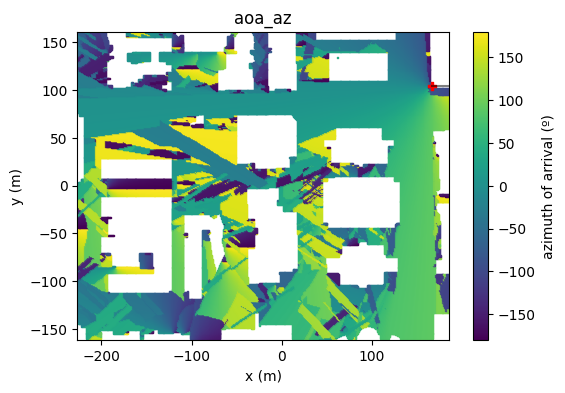

In [ ]:
main_keys = ['aoa_az', 'aoa_el', 'aod_az', 'aod_el', 'delay', 'power', 'phase',
             'los', 'num_paths']

cbar_lbls = ['azimuth of arrival (º)', 'elevation of arrival (º)',
             'azimuth of departure  (º)', 'elevation of departure (º)',
             'delay (s)', 'power (dBW)', 'phase (º)', 'line-of-sight status', 'number of paths']

for key in main_keys:
    plt_var = dataset[key][:,0] if dataset[key].ndim == 2 else dataset[key]
    # dm.plot_coverage(dataset.rx_pos, plt_var, bs_pos=dataset.tx_pos.T, title=key, cbar_title=cbar_lbls[main_keys.index(key)])
    dataset.plot_coverage(plt_var, title=key, cbar_title=cbar_lbls[main_keys.index(key)])
    break

(<Figure size 600x400 with 2 Axes>,
 <Axes3D: title={'center': 'LoS'}, xlabel='x (m)', ylabel='y (m)', zlabel='z (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52f9727c50>)

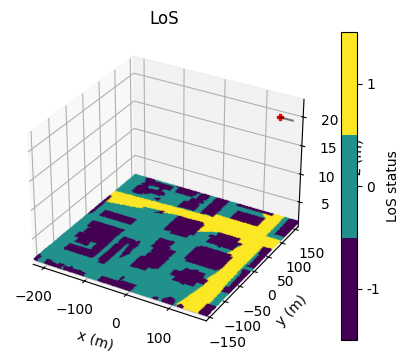

In [ ]:
#3D version
dm.plot_coverage(dataset.rx_pos, dataset['los'], bs_pos=dataset.tx_pos.T,
                bs_ori=dataset.tx_ori, title='LoS', cbar_title='LoS status',
                proj_3D=True, scat_sz=0.1)

## Rays

(<Figure size 1000x800 with 1 Axes>, <Axes: xlabel='x (m)', ylabel='y (m)'>)

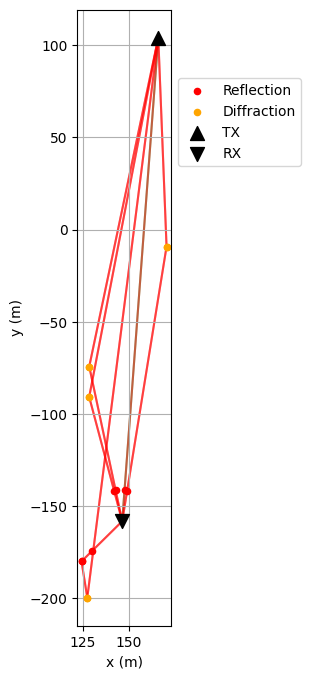

In [ ]:
u_idx = np.where(dataset.los == 1)[0][100]
dataset.plot_rays(u_idx, proj_3D=False, dpi=100)

## Path Plots
Note: For simplicity, the analysis is restricted to the **main path**.

### Percentage of the Power


(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Percentage of power in 1st path'}, xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52f96c03d0>)

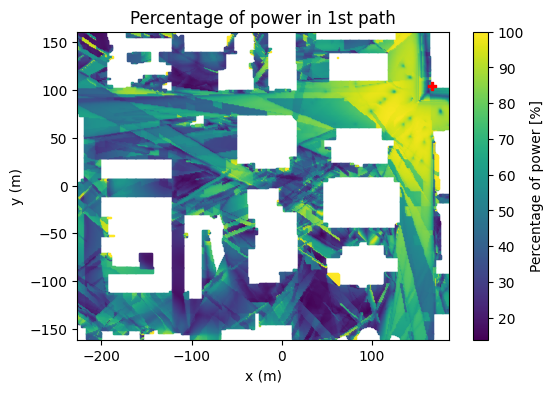

In [ ]:
pwr_in_first_path = dataset.lin_pwr[:, 0] / np.nansum(dataset.lin_pwr, axis=-1) * 100

dm.plot_coverage(dataset.rx_pos, pwr_in_first_path, bs_pos=dataset.tx_pos.T,
                title='Percentage of power in 1st path', cbar_title='Percentage of power [%]')

### Number of Interactions


(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Number of interactions in 1st path'}, xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52f954cf10>)

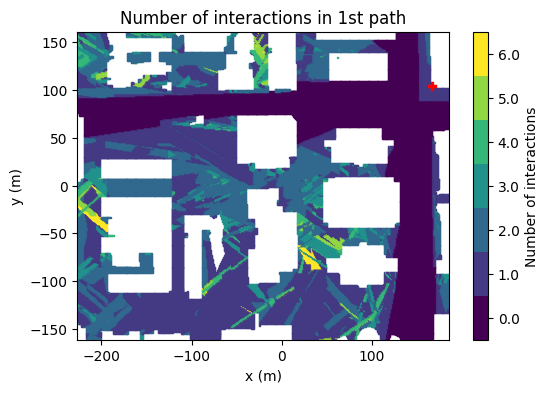

In [ ]:
dm.plot_coverage(dataset.rx_pos, dataset.num_interactions[:,0], bs_pos=dataset.tx_pos.T,
                title='Number of interactions in 1st path', cbar_title='Number of interactions')

### First Interaction Type


In [ ]:
dataset.inter_str[10]

array(['DR', 'D', 'DRR', 'DR', 'DRR', 'DR', 'DRRR', 'S', 'DS', 'S'],
      dtype='<U6')

(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Type of first bounce of first path'}, xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52f9404f10>)

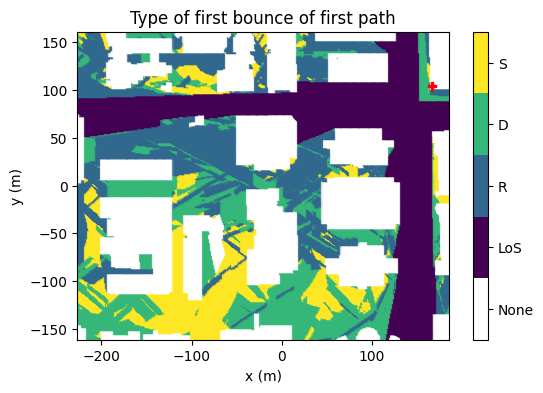

In [ ]:
first_bounce_codes = [code[0] if code else '' for code in dataset.inter_str[:,0]] # 'n', '2', '1', ...

unique_first_bounces = ['n', '', 'R', 'D', 'S']

coded_data = np.array([unique_first_bounces.index(code) for code in first_bounce_codes])

viridis_colors = plt.cm.viridis(np.linspace(0, 1, 4))  # Get 4 colors from viridis

dm.plot_coverage(dataset.rx_pos, coded_data, bs_pos=dataset.tx_pos.T,
                 title='Type of first bounce of first path',
                 cmap=['white'] + viridis_colors.tolist(), # white for 'n'
                 cbar_labels=['None', 'LoS', 'R', 'D', 'S'])

### Full Bounce Profile



Unique bounce profiles found: ['' 'D' 'DR' 'DRR' 'DRRR' 'DRRS' 'DRS' 'DS' 'R' 'RD' 'RDR' 'RDRR' 'RDRRR'
 'RDRS' 'RR' 'RRD' 'RRDR' 'RRR' 'RRRD' 'RRRR' 'RRRRR' 'RRRRRR' 'RRS' 'RS'
 'S' 'n']


(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Full bounce profile of first path'}, xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52dd3e6bd0>)

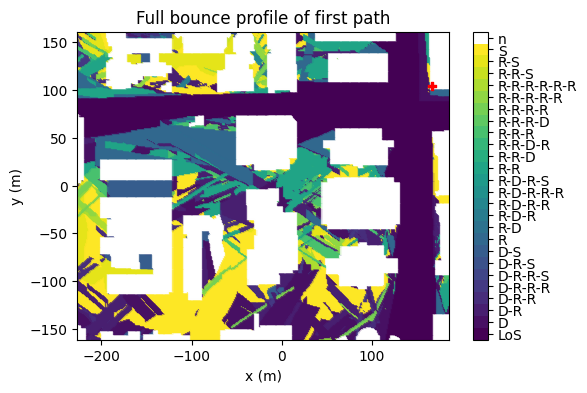

In [ ]:
# Full bounce profile visualization
unique_profiles = np.unique(dataset.inter_str[:,0])
print(f"\nUnique bounce profiles found: {unique_profiles}")

# Create mapping for full profiles
profile_to_idx = {profile: idx for idx, profile in enumerate(unique_profiles)}
full_profile_data = np.array([profile_to_idx[profile] for profile in dataset.inter_str[:, 0]])

# Create colormap with white for no interaction and viridis colors for the rest
n_profiles = len(unique_profiles)
viridis = plt.cm.viridis(np.linspace(0, 1, n_profiles - 1))  # Get colors for the rest

# Create decoded labels for the colorbar
profile_labels = ['-'.join(p) if p else 'LoS' for p in unique_profiles]

# Plot the full bounce profiles
dm.plot_coverage(dataset.rx_pos, full_profile_data,
                 bs_pos=dataset.tx_pos.T, title='Full bounce profile of first path',
                 cmap=viridis.tolist() + ['white'],
                 cbar_labels=profile_labels)

# Channel Generation

## Parameters

In [ ]:
dm.ChannelGenParameters()

{'bs_antenna': {'radiation_pattern': 'isotropic',
 'rotation': array([0, 0, 0]),
 'shape': array([8, 1]),
 'spacing': 0.5},
 'enable_doppler': 0,
 'enable_dual_polar': 0,
 'freq_domain': 1,
 'num_paths': 25,
 'ofdm': {'bandwidth': 10000000.0,
 'rx_filter': 0,
 'selected_subcarriers': array([0]),
 'subcarriers': 512},
 'ue_antenna': {'radiation_pattern': 'isotropic',
 'rotation': array([0, 0, 0]),
 'shape': array([1, 1]),
 'spacing': 0.5}}

In [ ]:
# Create channel parameters with all options
ch_params = dm.ChannelGenParameters()

# Antenna parameters

# Base station antenna parameters
ch_params.bs_antenna.rotation = np.array([0, 0, 0])  # [az, el, pol] in degrees
ch_params.bs_antenna.fov = np.array([360, 180])      # [az, el] in degrees
ch_params.bs_antenna.shape = np.array([8, 1])        # [horizontal, vertical] elements
ch_params.bs_antenna.spacing = 0.5                   # Element spacing in wavelengths

# User equipment antenna parameters
ch_params.ue_antenna.rotation = np.array([0, 0, 0])  # [az, el, pol] in degrees
ch_params.ue_antenna.fov = np.array([360, 180])      # [az, el] in degrees
ch_params.ue_antenna.shape = np.array([1, 1])        # [horizontal, vertical] elements
ch_params.ue_antenna.spacing = 0.5                   # Element spacing in wavelengths

# Channel parameters
ch_params.freq_domain = True  # Whether to compute frequency domain channels
ch_params.num_paths = 25      # Number of paths

# OFDM parameters
ch_params.ofdm.bandwidth = 10e6                      # Bandwidth in Hz
ch_params.ofdm.subcarriers = 512                     # Number of subcarriers
ch_params.ofdm.selected_subcarriers = np.arange(1)   # Which subcarriers to generate
ch_params.ofdm.rx_filter = 0                         # Receive Low Pass / ADC Filter

# Generate channels
dataset.compute_channels(ch_params)
dataset.channel.shape

Generating channels: 100%|██████████| 131931/131931 [00:03<00:00, 34143.72it/s]


(131931, 1, 8, 1)

In [ ]:
dm.info('channel')

channel: Channel matrix between TX and RX antennas
	[num_rx, num_rx_ant, num_tx_ant, X], with X = number of paths in time domain 
	 or X = number of subcarriers in frequency domain


In [ ]:
dm.info('ch_params')


Channel Generation Parameters:
bs_antenna: Base station antenna array configuration parameters. 

ue_antenna: User equipment antenna array configuration parameters. 

bs_antenna.shape: Antenna array dimensions [X, Y] or [X, Y, Z] elements
	 Default: [1, 1]  |  Type: list[int]  |  Units: number of elements
bs_antenna.spacing: Spacing between antenna elements
	 Default: 0.5  |  Type: float  |  Units: wavelengths
bs_antenna.rotation: Rotation angles [azimuth, elevation, polarization]
	 Default: [0, 0, 0]  |  Type: list[float]  |  Units: degrees
bs_antenna.radiation_pattern: Antenna element radiation pattern
	 Default: "isotropic"  |  Type: str  |  Options: "isotropic", "halfwave-dipole"
enable_doppler: Enable/disable Doppler effect simulation
	 Default: False  |  Type: bool
enable_dual_polar: Enable/disable polarization modeling
	 Default: False  |  Type: bool
num_paths: Maximum number of paths to consider per user
	 Default: 10  |  Type: int  |  Units: number of paths
freq_domain: Chann

Below is a brief summary for the parameters. For more details, see [DeepMIMOv3 page](https://www.deepmimo.net/versions/deepmimo-v3-python/).

| Parameter              | Default Value          | Description                                                                           |
|------------------------|------------------------|---------------------------------------------------------------------------------------|
| **enable_doppler**     | 0                          | Enable Doppler shift (if available in the scenario)                                |
| **enable_dual_polar**  | 0                          | Enable dual Dual-polarized antennas (if available)                |
| **num_paths**          | 25                          | Number of maximum paths                                                            |
| **OFDM_channels**      | 1                          | Generate OFDM (True) or time domain channels (False)                               |
| | | |
| **OFDM**               |                            | OFDM parameters (only applies if OFDM_channels is True)                            |
|   - **subcarriers**    | 512                        | Total number of subcarriers                                                        |
|   - **selected_subcarriers** | [0]                  | Subcarriers to be generated                                                        |
|   - **bandwidth**      | 0.05                       | Bandwidth                                                                          |
|   - **RX_filter**      | 0                          | Receive filter                                                                     |
| | | |
| **bs_antenna**/**ue_antenna**         |                            | BS/UE antenna properties                                            |
|   - **radiation_pattern** | isotropic              | Radiation pattern applied to the antenna, in ['isotropic', 'halfwave-dipole']       |
|   - **rotation**       | [0, 0, 0]                  | Rotation of the antenna - in compliance with 38.901                                |
|   - **shape**          | [8, 1]                     | UPA panel shape in the shape of (horizontal elements, vertical elements)           |
|   - **spacing**        | 0.5                        | Antenna spacing                                                                    |

## Time Domain

In [ ]:
# Channel computation parameters
ch_params.freq_domain = False     # Whether to compute frequency domain channels

dataset.compute_channels(ch_params)
dataset.channel.shape  # as many taps as paths

Generating channels: 100%|██████████| 131931/131931 [00:01<00:00, 99311.68it/s]


(131931, 1, 8, 10)

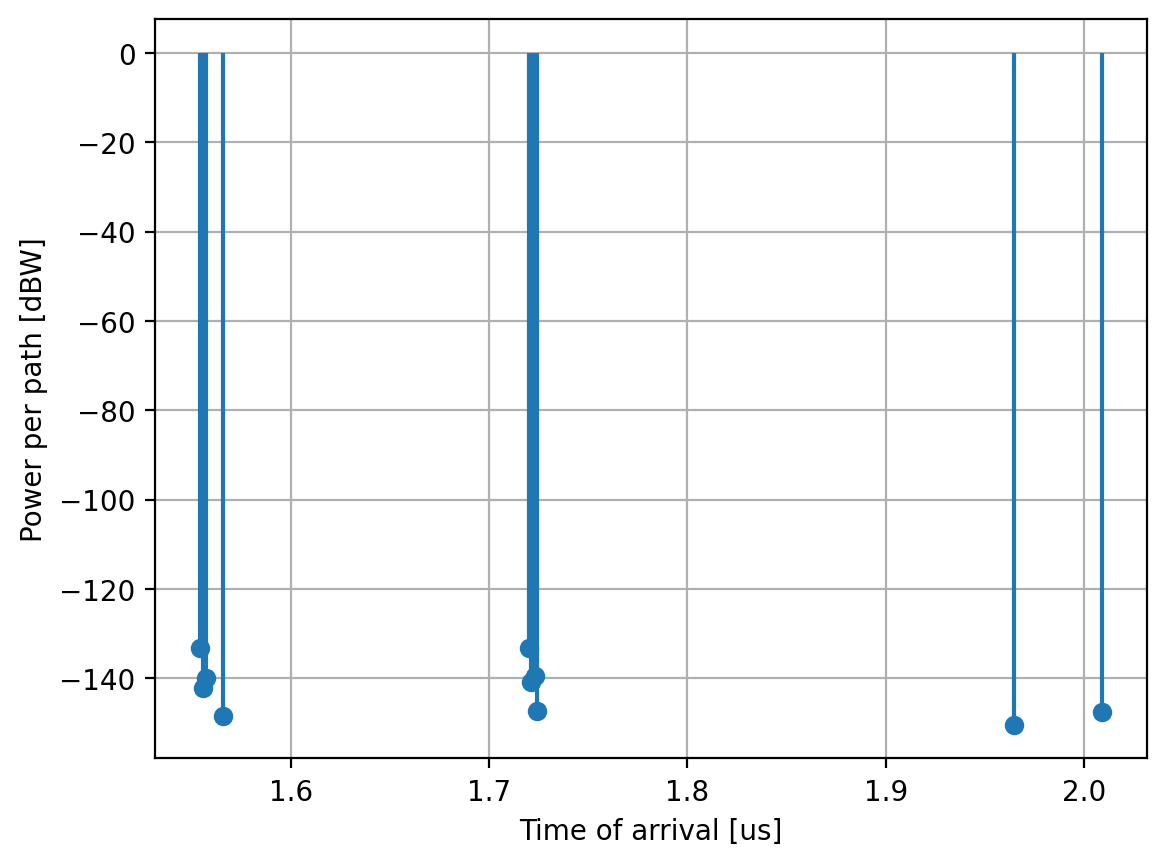

In [ ]:
# Plot CIR
user_idx = np.where(dataset.n_paths > 0)[0][0]
plt.figure(dpi=200)
plt.stem(dataset.delay[user_idx]*10**6, dataset.power[user_idx], basefmt='none')
plt.xlabel('Time of arrival [us]')
plt.ylabel('Power per path [dBW]')
plt.grid()
plt.show()

## Frequency Domain (OFDM)

Generating channels: 100%|██████████| 131931/131931 [00:06<00:00, 20448.05it/s]


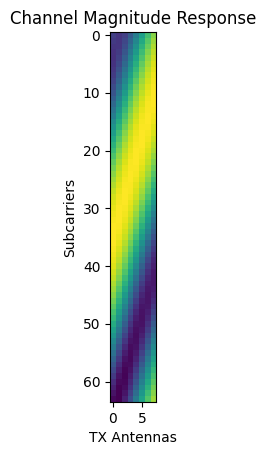

In [ ]:
ch_params = dm.ChannelGenParameters()

ch_params.num_paths = 5
ch_params.ofdm.bandwidth = 50e6
ch_params.ofdm.selected_subcarriers = np.arange(64)      # Which subcarriers to generate

channels = dataset.compute_channels(ch_params)

# Visualize channel magnitude response (NOTE: requires at >1 subcarriers and antennas)
user_idx = np.where(dataset.n_paths > 0)[0][0]
plt.imshow(np.abs(np.squeeze(channels[user_idx]).T))
plt.title('Channel Magnitude Response')
plt.xlabel('TX Antennas')
plt.ylabel('Subcarriers')
plt.show()

# NOTE: show the case of when there are too few subcarriers

# Basic Operations


## Line-of-Sight Status

In [ ]:
dm.info('los')

los: Line of sight status for each path. 
	1: Direct path between TX and RX. 
	0: Indirect path (reflection, diffraction, scattering, or transmission). 
	-1: No paths between TX and RX. 
	[num_rx, ]


In [ ]:
dataset.los.shape

(131931,)

(<Figure size 600x400 with 2 Axes>,
 <Axes: xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52deb24f10>)

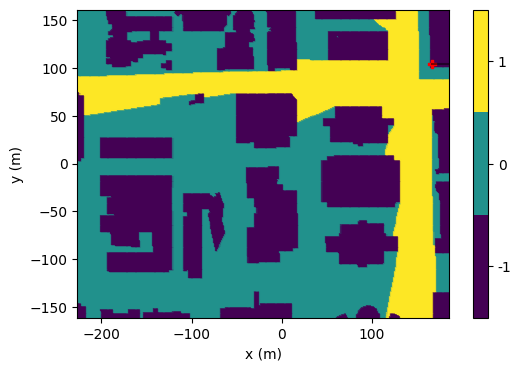

In [ ]:
dataset.plot_coverage(dataset.los)


Number of active positions: 85157
Number of inactive positions: 46774


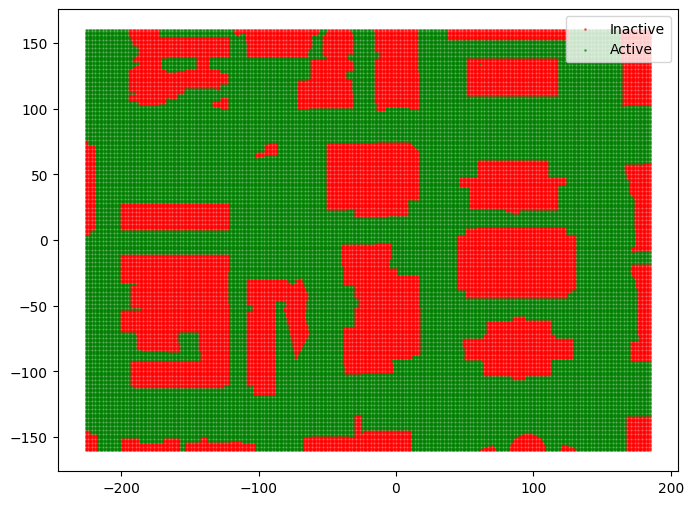

In [ ]:
active_mask = dataset.num_paths > 0
print(f"\nNumber of active positions: {np.sum(active_mask)}")
print(f"Number of inactive positions: {np.sum(~active_mask)}")

# Create scatter plot showing active vs inactive positions
plt.figure(figsize=(8, 6))
plt.scatter(dataset.rx_pos[~active_mask, 0], dataset.rx_pos[~active_mask, 1],
           alpha=0.5, s=1, c='red', label='Inactive')
plt.scatter(dataset.rx_pos[active_mask, 0], dataset.rx_pos[active_mask, 1],
           alpha=0.5, s=1, c='green', label='Active')
plt.legend()
plt.show()

# dm.plot_coverage(dataset['rx_pos'], dataset.los != -1, cmap=['red', 'green'])

(<Figure size 600x400 with 2 Axes>,
 <Axes: xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52fd132650>)

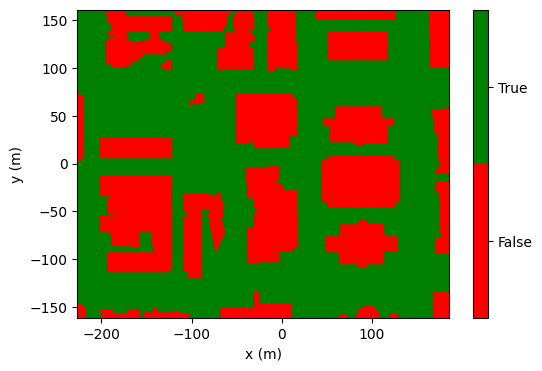

In [ ]:
dm.plot_coverage(dataset['rx_pos'], dataset.los != -1, cmap=['red', 'green'])

## Pathloss

(<Figure size 2400x1000 with 4 Axes>,
 <Axes: title={'center': 'Coherent pathloss'}, xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52dec70b90>)

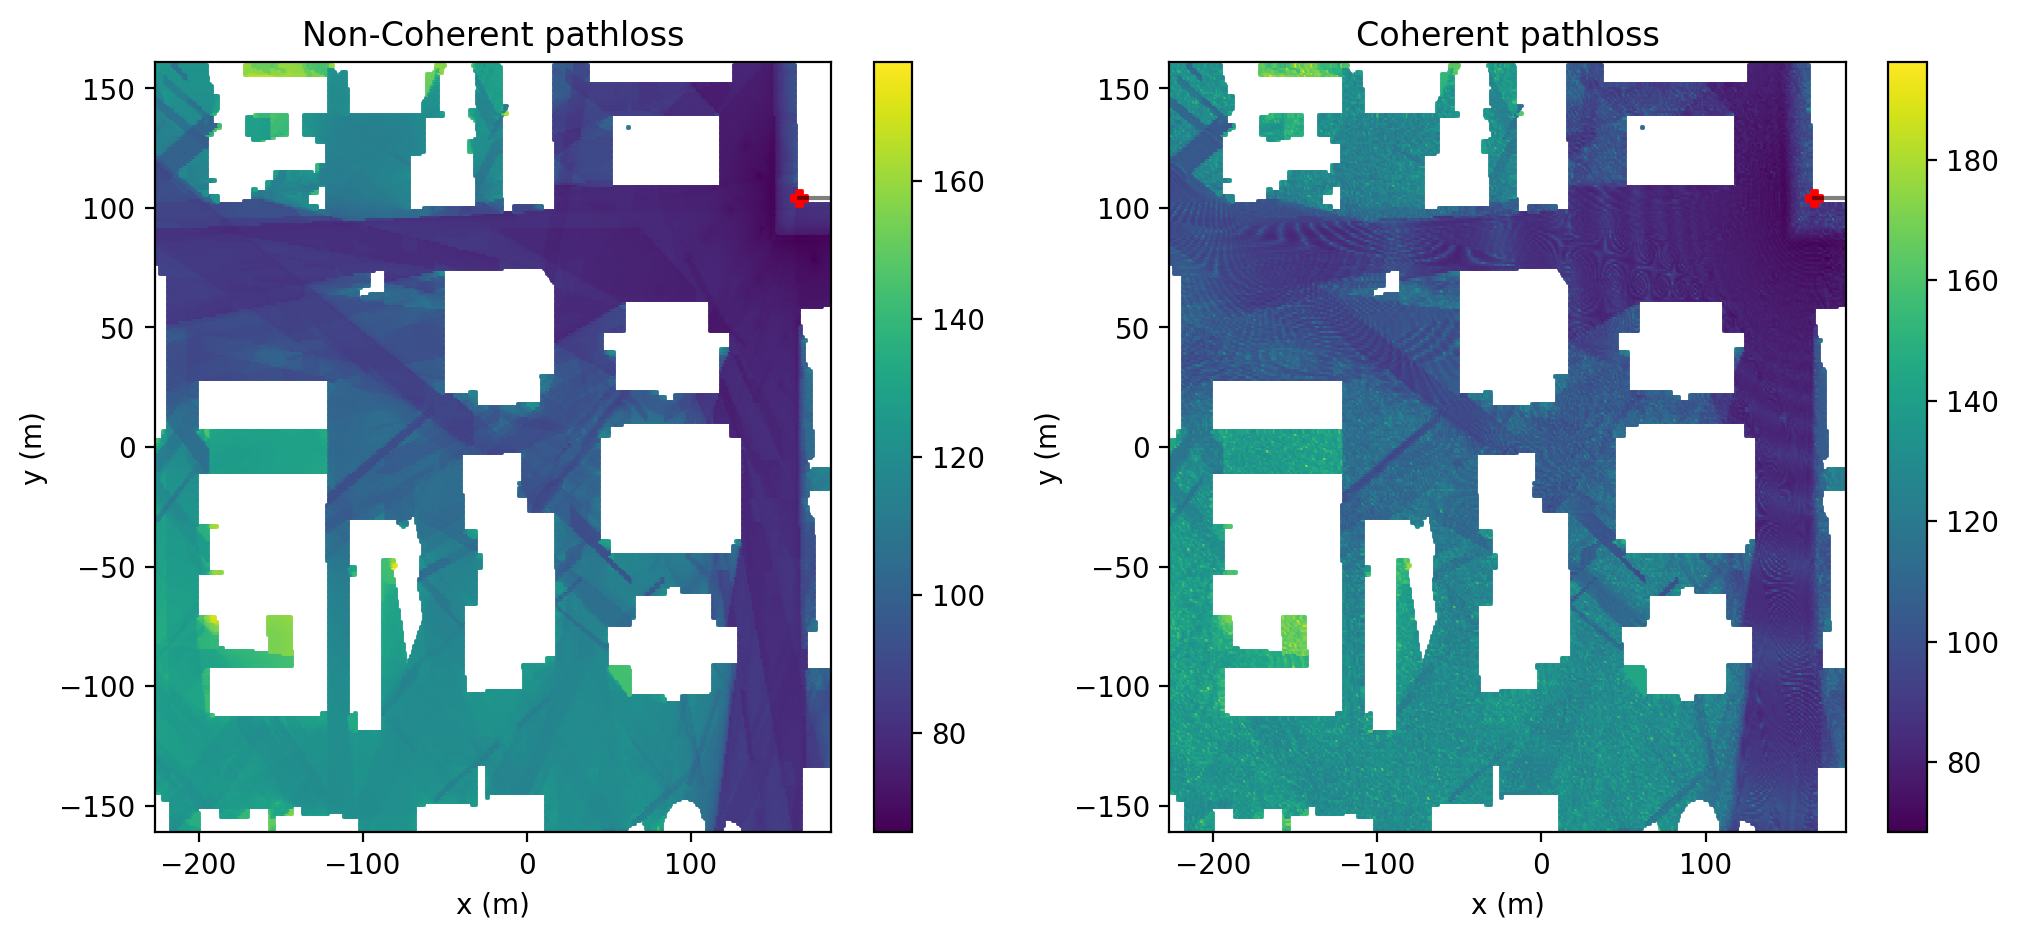

In [ ]:
non_coherent_pathloss = dataset.compute_pathloss(coherent=False)
coherent_pathloss = dataset.compute_pathloss(coherent=True) # default

_, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=200)
dataset.plot_coverage(non_coherent_pathloss, title='Non-Coherent pathloss', ax=axes[0])
dataset.plot_coverage(coherent_pathloss, title='Coherent pathloss', ax=axes[1])

## Implicit Computations

In [ ]:
# Implicit and lazy computations
# Functions are public when arguments are needed

# Public compute functions
dataset.channels          # calls dataset.compute_channels()
dataset.pathloss          # calls dataset.compute_pathloss()

# Hidden compute functions
dataset.distance           # calls dataset._compute_distances()
dataset.num_paths          # calls dataset._compute_num_paths()
dataset.num_interactions   # calls dataset._compute_num_interactions()
dataset.los                # calls dataset._compute_los()
dataset.n_ue               # calls dataset._compute_n_ue()
dataset.grid_size          # calls dataset._compute_grid_info()
dataset.grid_spacing       # calls dataset._compute_grid_info()

array([1., 1.], dtype=float32)

## Aliases

In [ ]:
checks = [
    dataset.pwr is dataset.power,
    dataset.pl is dataset.pathloss,
    dataset.ch is dataset.channels,
    dataset.ch_params is dataset.channel_params,
    dataset.n_paths is dataset.num_paths,
    dataset.aoa_phi is dataset.aoa_az,
    dataset.bs_pos is dataset.tx_pos,
    dataset.toa is dataset.delay,
]

for check in checks:
    print(check)

True
True
True
True
True
True
True
True


<table>
    <tr>
        <th>Original</th>
        <th>Aliases</th>
    </tr>
    <tr><td rowspan="1">los</td><td>los_status</td></tr>
    <tr><td rowspan="3">channel</td><td>ch</td></tr>
    <tr><td>chs</td></tr>
    <tr><td>channels</td></tr>
    <tr><td rowspan="1">ch_params</td><td>channel_params</td></tr>
    <tr><td rowspan="2">power</td><td>pwr</td></tr>
    <tr><td>powers</td></tr>
    <tr><td rowspan="3">pwr_linear</td><td>lin_pwr</td></tr>
    <tr><td>linear_power</td></tr>
    <tr><td>pwr_lin</td></tr>
    <tr><td rowspan="1">pwr_linear_ant_gain</td><td>pwr_ant_gain</td></tr>
    <tr><td rowspan="4">rx_pos</td><td>ue_pos</td></tr>
    <tr><td>rx_loc</td></tr>
    <tr><td>rx_position</td></tr>
    <tr><td>rx_locations</td></tr>
    <tr><td rowspan="4">tx_pos</td><td>bs_pos</td></tr>
    <tr><td>tx_loc</td></tr>
    <tr><td>tx_position</td></tr>
    <tr><td>tx_locations</td></tr>
    <tr><td rowspan="2">pathloss</td><td>pl</td></tr>
    <tr><td>path_loss</td></tr>
    <tr><td rowspan="2">distance</td><td>dist</td></tr>
    <tr><td>dists</td></tr>
    <tr><td rowspan="2">aoa_az</td><td>aoa_phi</td></tr>
    <tr><td>aoa_theta</td></tr>
    <tr><td rowspan="2">aod_az</td><td>aod_phi</td></tr>
    <tr><td>aod_theta</td></tr>
    <tr><td rowspan="1">num_paths</td><td>n_paths</td></tr>
    <tr><td rowspan="2">delay</td><td>toa</td></tr>
    <tr><td>time_of_arrival</td></tr>
    <tr><td rowspan="2">interactions</td><td>bounce_type</td></tr>
    <tr><td>interactions</td></tr>
    <tr><td rowspan="3">interactions_pos</td><td>bounce_pos</td></tr>
    <tr><td>interaction_positions</td></tr>
    <tr><td>interaction_locations</td></tr>
</table>

## Attribute Access

In [ ]:
for var_name in ['pl', 'rx_pos', 'aoa_az', 'channel', ]:
    a = dataset[var_name]
    b = getattr(dataset, var_name)
    print(f"dataset['{var_name}'] == dataset.{var_name}: {a is b}")

dataset['pl'] == dataset.pl: True
dataset['rx_pos'] == dataset.rx_pos: True
dataset['aoa_az'] == dataset.aoa_az: True
dataset['channel'] == dataset.channel: True


## Antenna Rotation

### Azimuth

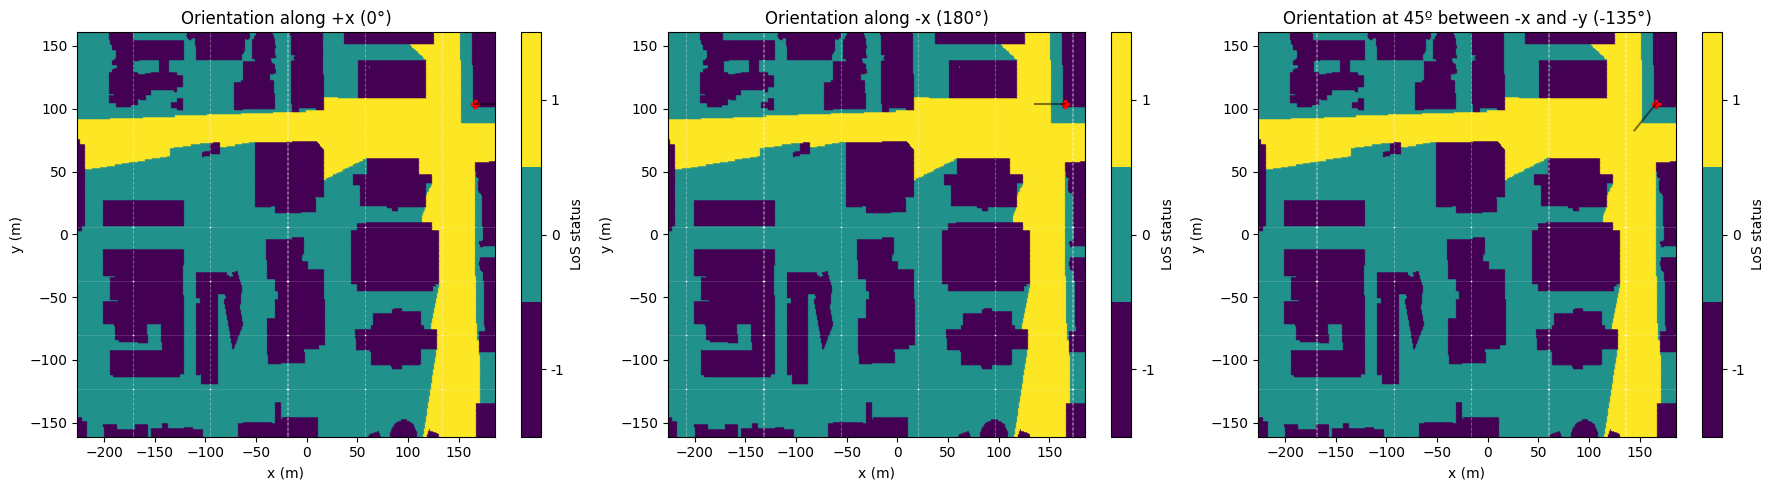

In [ ]:
params = dm.ChannelGenParameters()

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)

# Define 3 different rotations to show
rotations = [np.array([0, 0, 0]),     # Facing +x
             np.array([0, 0, 180]),   # Facing -x
             np.array([0, 0, -135])]  # Facing 45º between -x and -y

titles = ['Orientation along +x (0°)',
          'Orientation along -x (180°)',
          'Orientation at 45º between -x and -y (-135°)']

# Plot each azimuth rotation
for i, (rot, title) in enumerate(zip(rotations, titles)):
    # Update channel parameters with new rotation
    params.bs_antenna.rotation = rot
    dataset.set_channel_params(params)  # safest way to set params

    # Create coverage plot in current subplot
    dm.plot_coverage(dataset.rx_pos, dataset.los,
                     bs_pos=dataset.tx_pos.T, bs_ori=dataset.tx_ori,
                     ax=axes[i], title=title, cbar_title='LoS status')


### Elevation

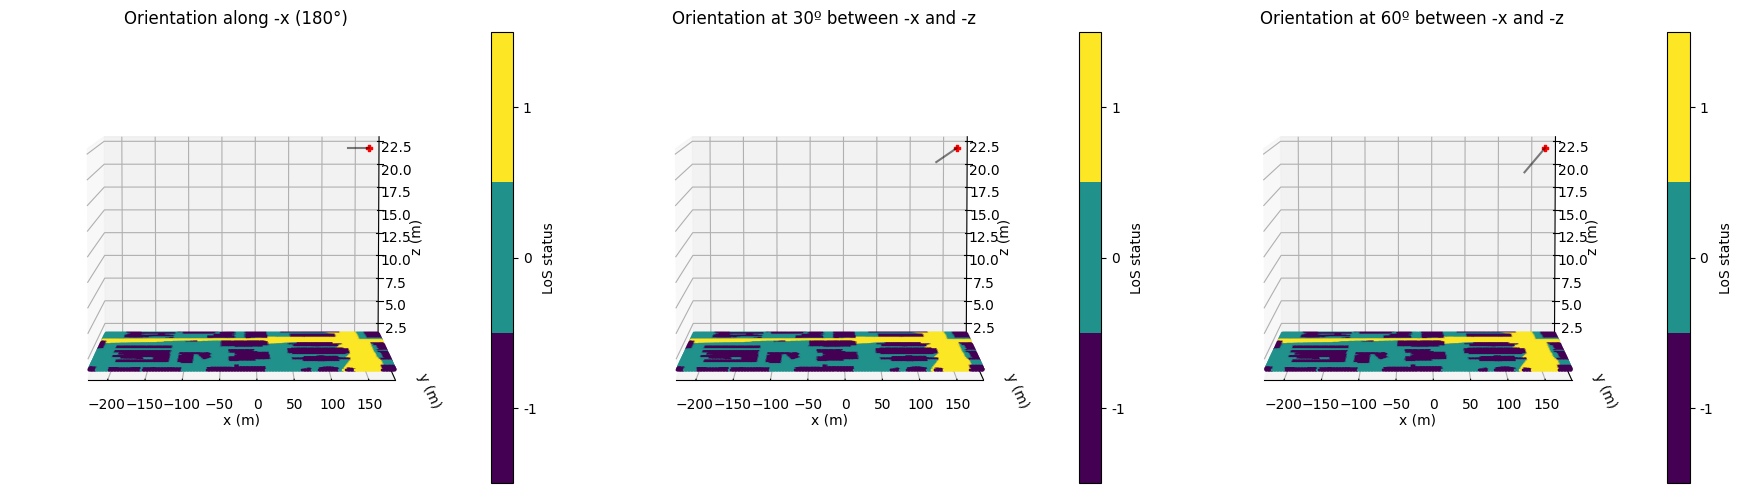

In [ ]:
params = dm.ChannelGenParameters()

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={'projection': '3d'},
                         tight_layout=True)

# Define 3 different rotations to show
rotations = [np.array([0,  0, -180]),   # Facing -x
             np.array([0, 30, -180]),   # Facing 30º below -x in XZ plane
             np.array([0, 60, -180])]   # Facing 60º below -x in XZ plane

titles = ['Orientation along -x (180°)',
          'Orientation at 30º between -x and -z',
          'Orientation at 60º between -x and -z']

# Plot each azimuth rotation
for i, (rot, title) in enumerate(zip(rotations, titles)):
    # Update channel parameters with new rotation
    params.bs_antenna.rotation = rot
    dataset.set_channel_params(params)

    # Create coverage plot in current subplot
    dataset.plot_coverage(dataset.los, proj_3D=True, ax=axes[i],
                          title=title, cbar_title='LoS status')
    axes[i].view_init(elev=5, azim=-90)  # Set view to xz plane to see tilt
    axes[i].set_yticks([])  # Remove y-axis ticks to unclutter the plot


# Advanced Operations

## Field-of-View

### Azimuth

(<Figure size 600x400 with 2 Axes>,
 <Axes: xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52f906bd90>)

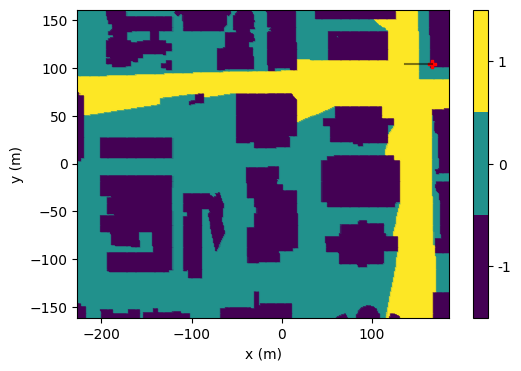

In [ ]:
dataset.apply_fov()
dataset.plot_coverage(dataset.los)

Iteration 0: Setting FoV to [180 180]
Iteration 1: Setting FoV to [ 90 180]
Iteration 2: Setting FoV to [ 60 180]


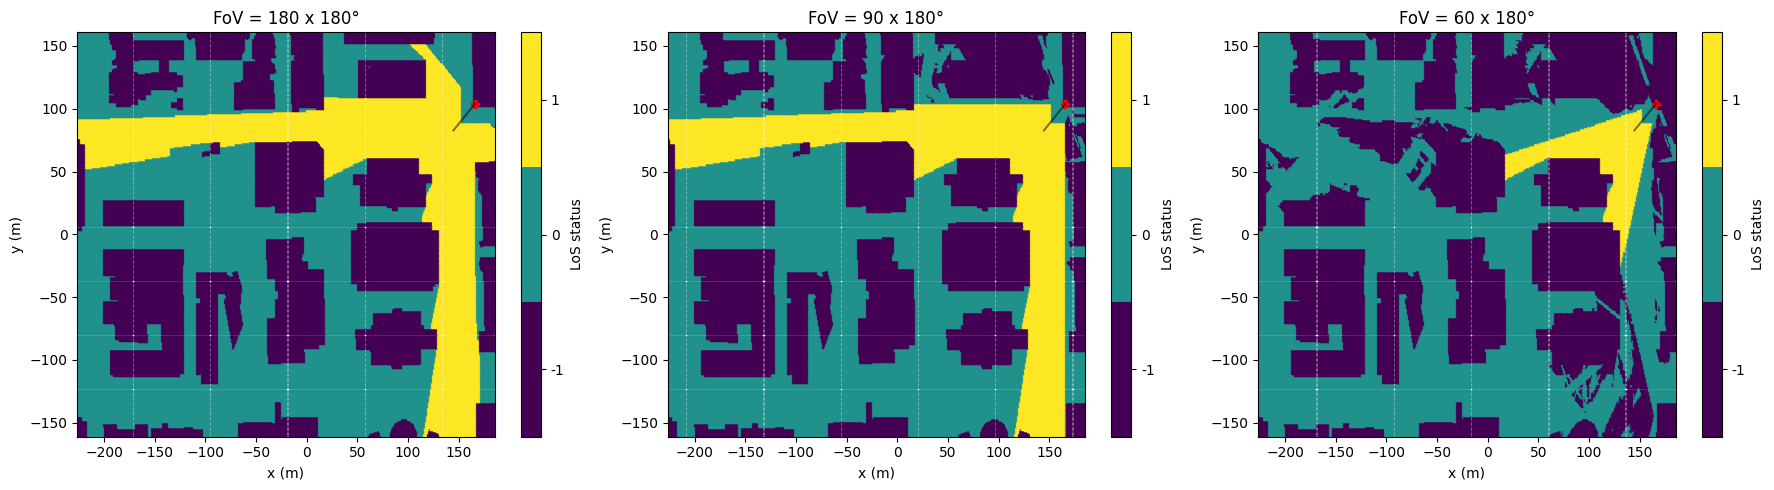

In [ ]:
params = dm.ChannelGenParameters()
params['bs_antenna']['rotation'] = np.array([0, 0, -135])
dataset.set_channel_params(params)

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)

# Define 3 FoV
fovs = [np.array([180, 180]),   # Facing -x
        np.array([ 90, 180]),   # Facing 30º below -x in XZ plane
        np.array([ 60, 180])]   # Facing 60º below -x in XZ plane

titles = [f'FoV = {fov[0]} x {fov[1]}°' for fov in fovs]

# Plot each azimuth rotation
for i, (fov, title) in enumerate(zip(fovs, titles)):
    # Update channel parameters with new rotation
    print(f"Iteration {i}: Setting FoV to {fov}")
    dataset.apply_fov(bs_fov=fov)  # dataset.apply_fov() to reset fov

    dataset.plot_coverage(dataset.los, ax=axes[i], title=title, cbar_title='LoS status')

# Note, when applying fov, several cached values will be invalidated, like the los and channels

### Elevation

Iteration 0: Setting FoV to [360  90]
Iteration 1: Setting FoV to [360  45]
Iteration 2: Setting FoV to [360  30]


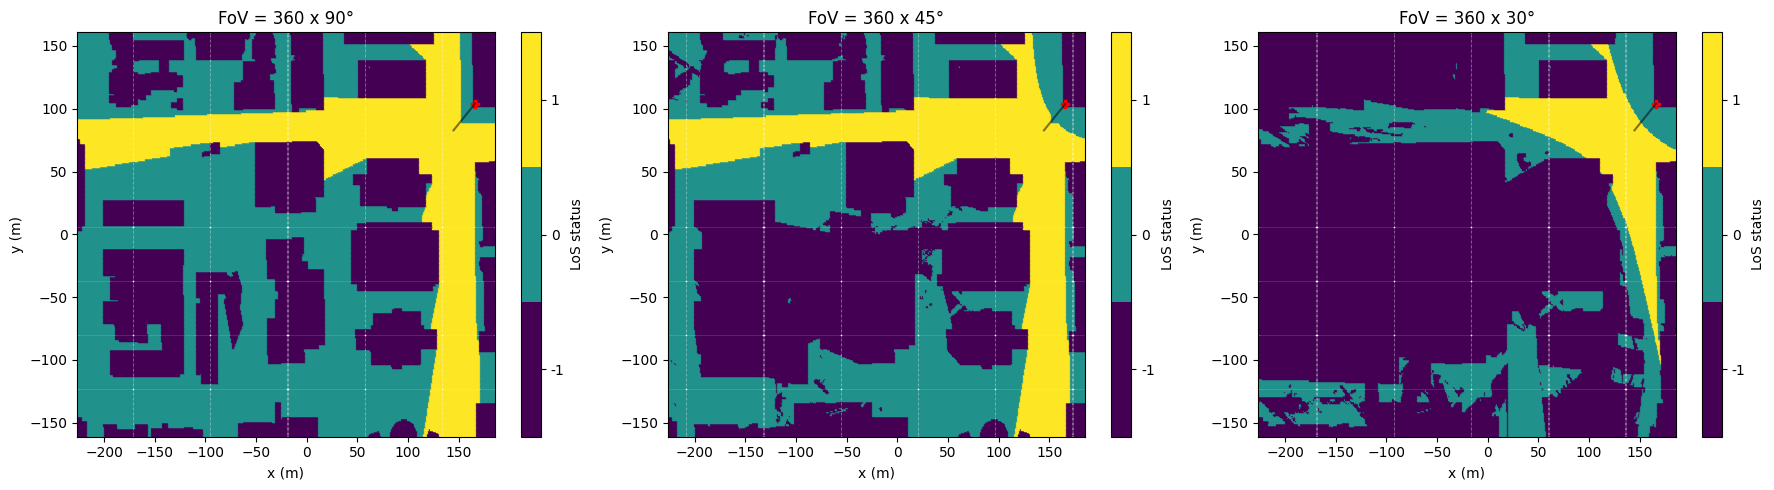

In [ ]:
params = dm.ChannelGenParameters()
params['bs_antenna']['rotation'] = np.array([0, 30, -135])
dataset.set_channel_params(params)

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)

# Define 3 FoV
fovs = [np.array([360, 90]),   # Facing -x
        np.array([360, 45]),   # Facing 30º below -x in XZ plane
        np.array([360, 30])]   # Facing 60º below -x in XZ plane

titles = [f'FoV = {fov[0]} x {fov[1]}°' for fov in fovs]

# Plot each azimuth rotation
for i, (fov, title) in enumerate(zip(fovs, titles)):
    print(f"Iteration {i}: Setting FoV to {fov}")
    dataset.apply_fov(bs_fov=fov)
    dataset.plot_coverage(dataset.los, ax=axes[i], title=title, cbar_title='LoS status')

dataset.apply_fov() # to reset fov

# Note, to see path information affected by fov, index arrays with: dataset.los != -1

# Scene & Materials

## Visualization

(<Figure size 1500x1500 with 1 Axes>,
 <Axes3D: title={'center': 'Buildings: 35, Terrain: 1'}, xlabel='X', ylabel='Y', zlabel='Z'>)

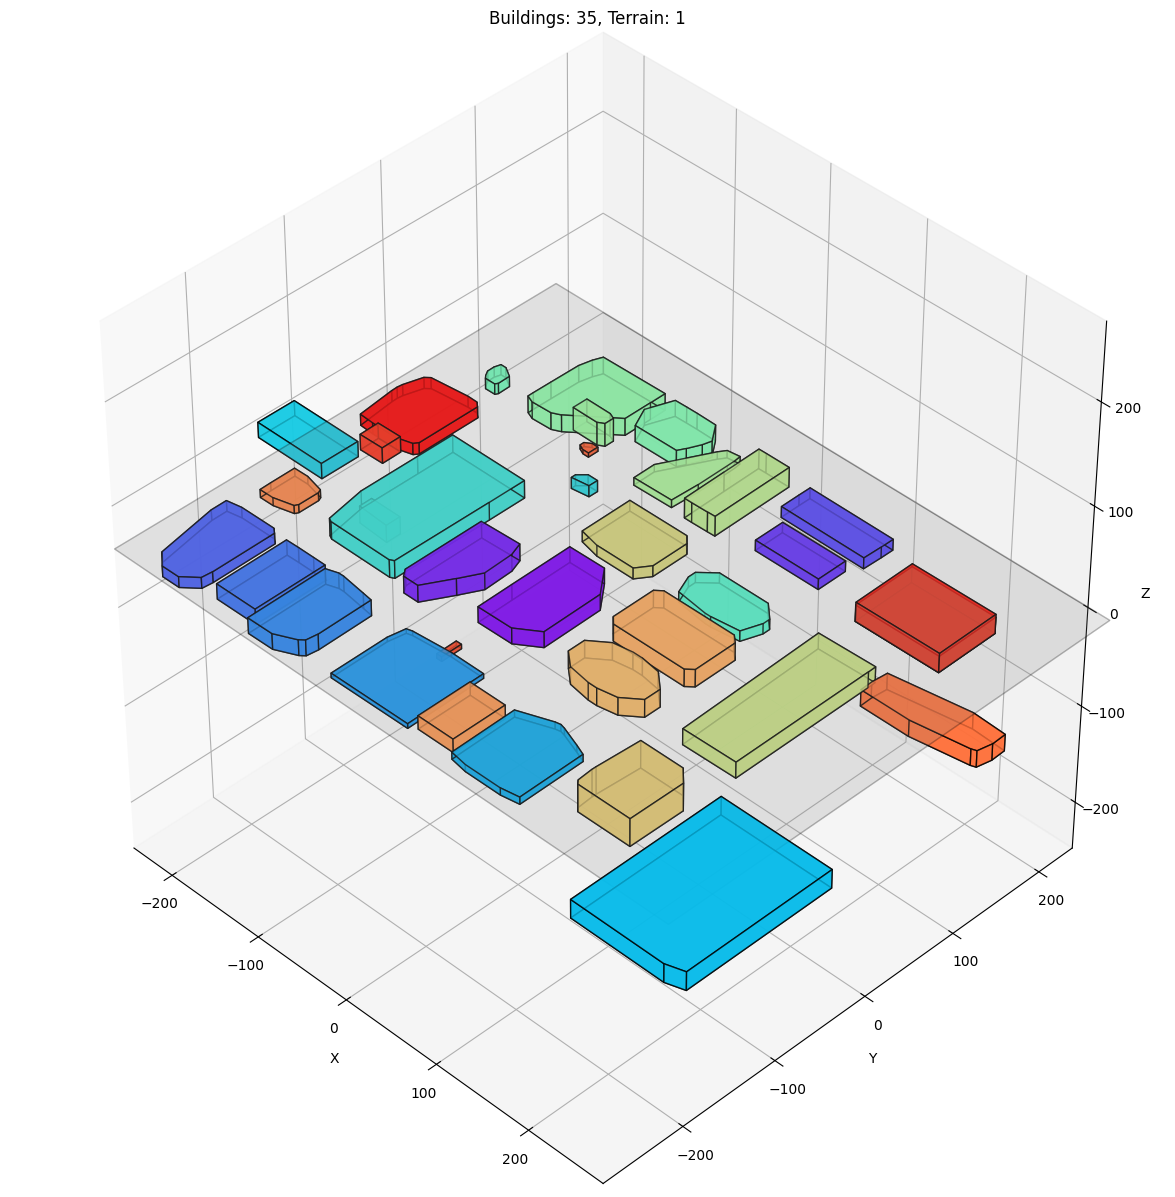

In [ ]:
# Plot the full scene
dataset.scene.plot()

(<Figure size 1500x1500 with 1 Axes>,
 <Axes3D: title={'center': 'Buildings: 35, Terrain: 1'}, xlabel='X', ylabel='Y', zlabel='Z'>)

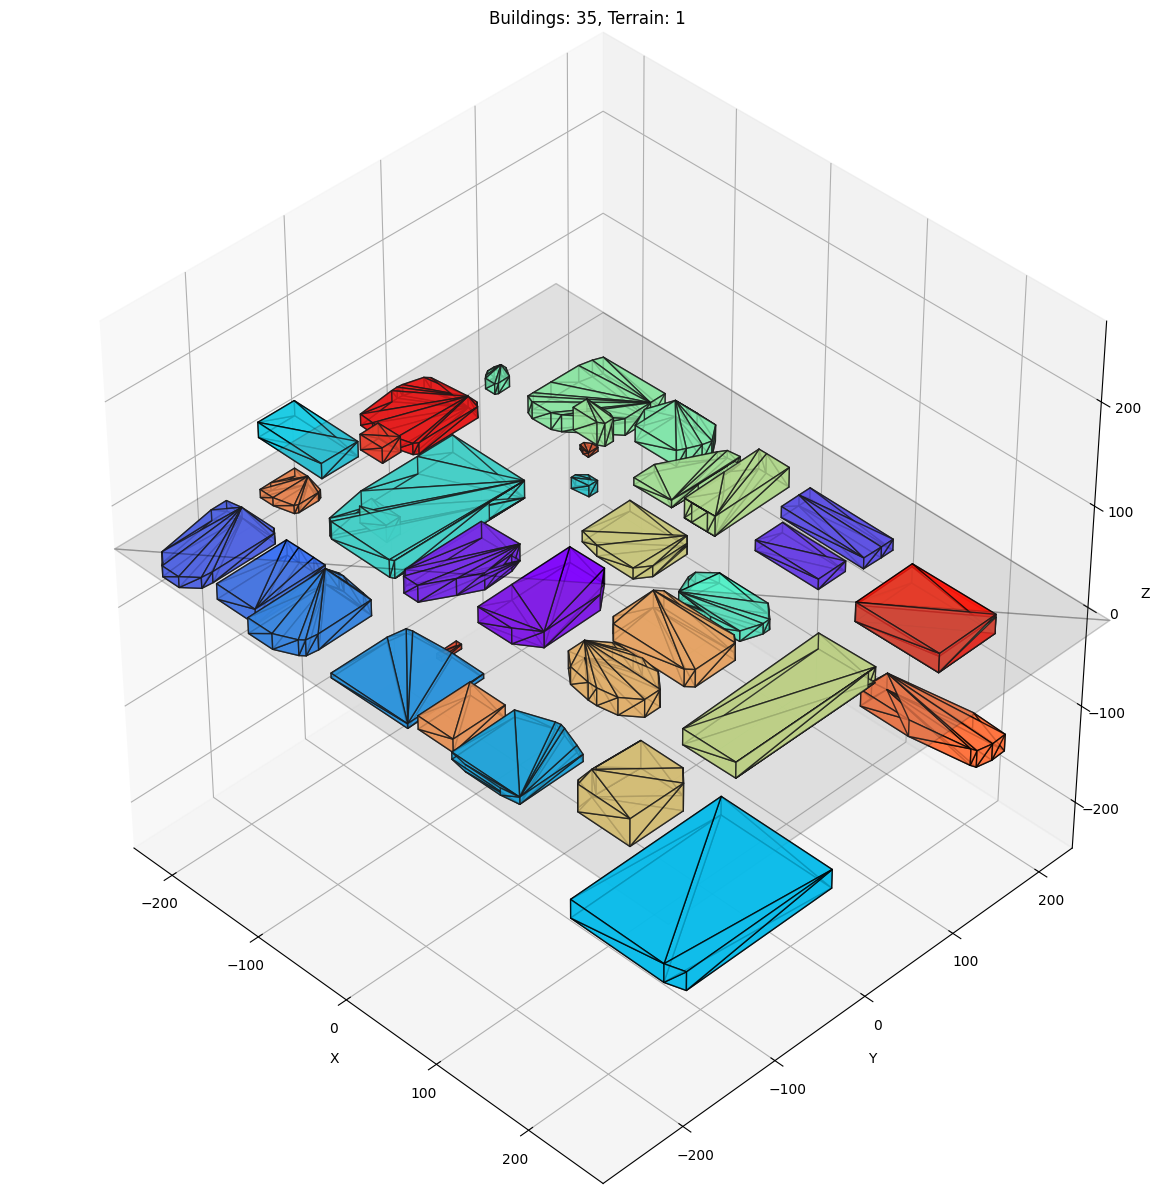

In [ ]:
# Plot the scene with triangular faces
dataset.scene.plot(mode='tri_faces')

## Operations

In [ ]:
print("\nScene and Materials Example")
print("-" * 50)

scene = dataset.scene

# 1. Basic scene information
print("\nScene Overview:")
print(f"- Total objects: {len(scene.objects)}")

# Get objects by category
buildings = scene.get_objects(label='buildings')
terrain = scene.get_objects('terrain')
vegetation = scene.get_objects('vegetation')

print(f"- Buildings: {len(buildings)}")
print(f"- Terrain: {len(terrain)}")
print(f"- Vegetation: {len(vegetation)}")

# 2. Materials and Filtering
materials = dataset.materials

# Get materials used by buildings
building_materials = buildings.get_materials()
print(f"\nMaterials used in buildings: {building_materials}")

# Different ways to filter objects
print("\nFiltering examples:")

# Filter by label only
buildings = scene.get_objects(label='buildings')
print(f"- Buildings: {len(buildings)}")

# Filter by material only
material_idx = building_materials[0]
objects_with_material = scene.get_objects(material=material_idx)
print(f"- Objects with material {material_idx}: {len(objects_with_material)}")

# Filter by both label and material
buildings_with_material = scene.get_objects(label='buildings', material=material_idx)
print(f"- Buildings with material {material_idx}: {len(buildings_with_material)}")

# Print material properties
material = materials[material_idx]
print(f"\nMaterial {material_idx} properties:")
print(f"- Name: {material.name}")
print(f"- Permittivity: {material.permittivity}")
print(f"- Conductivity: {material.conductivity}")

# 3. Object Properties
print("\nObject Properties:")
building = buildings[0]
print(f"- Building faces: {len(building.faces)}")
print(f"- Building height: {building.height:.2f}m")
print(f"- Building volume: {building.volume:.2f}m³")
print(f"- Building footprint area: {building.footprint_area:.2f}m²")

# 4. Bounding Boxes
print("\nBuildings Bounding Box:")
bb = buildings.bounding_box
print(f"- Width (X): {bb.width:.2f}m")
print(f"- Length (Y): {bb.length:.2f}m")
print(f"- Height (Z): {bb.height:.2f}m")


Scene and Materials Example
--------------------------------------------------

Scene Overview:
- Total objects: 36
- Buildings: 35
- Terrain: 1
- Vegetation: 0

Materials used in buildings: [0]

Filtering examples:
- Buildings: 35
- Objects with material 0: 36
- Buildings with material 0: 35

Material 0 properties:
- Name: ITU Concrete 3.5 GHz
- Permittivity: 5.31
- Conductivity: 0.08987

Object Properties:
- Building faces: 9
- Building height: 15.73m
- Building volume: 82957.58m³
- Building footprint area: 290.54m²

Buildings Bounding Box:
- Width (X): 681.50m
- Length (Y): 470.31m
- Height (Z): 27.24m


# User Sampling

## Dataset Trimming
For sampling users, we always have to find first the indices of the users we want to keep
Then, we can use them to index particular matrix, or the entire dataset -> `subset()` method



Active Users and Dataset Subsetting (Trimming) Example
--------------------------------------------------
Original dataset has 131931 UEs
Found 85157 active UEs
New dataset has 85157 UEs


(<Figure size 600x400 with 2 Axes>,
 <Axes: xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52f7c303d0>)

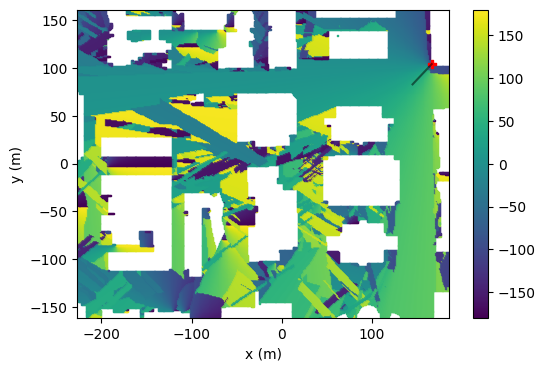

In [ ]:
print("\nActive Users and Dataset Subsetting (Trimming) Example")
print("-" * 50)

# Get indices of active users (those with paths)
active_idxs = dataset.get_active_idxs()
print(f"Original dataset has {dataset.n_ue} UEs")
print(f"Found {len(active_idxs)} active UEs")

# Create new dataset with only active users
dataset_t = dataset.subset(active_idxs)
print(f"New dataset has {dataset_t.n_ue} UEs")

dataset_t.plot_coverage(dataset_t.aoa_az[:,0])

## Uniform

(<Figure size 900x600 with 2 Axes>,
 <Axes: xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52f7cc83d0>)

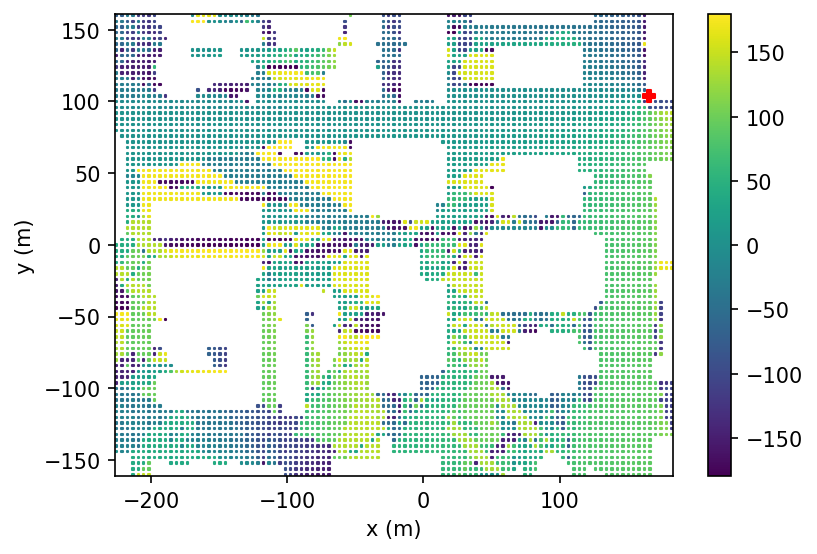

In [ ]:
idxs = dataset.get_uniform_idxs([4,4])
dm.plot_coverage(dataset.rx_pos[idxs], dataset.aoa_az[idxs, 0],
                 dpi=150, bs_pos=dataset.tx_pos.T)

## Linear

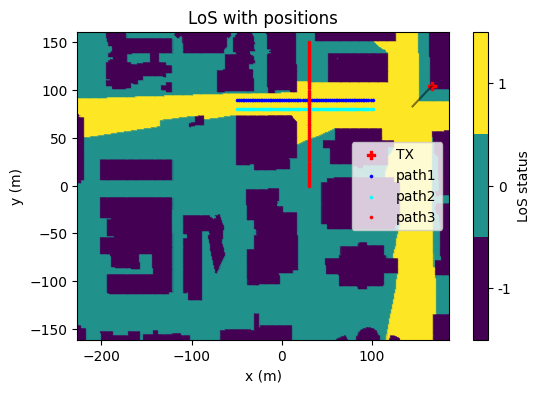

In [ ]:
# Get the closest dataset positions for a given path
idxs1 = dm.LinearPath(dataset.rx_pos, [100, 90], [-50,  90], n_steps=75).idxs
idxs2 = dm.LinearPath(dataset.rx_pos, [100, 80], [-50,  80], n_steps=75).idxs
idxs3 = dm.LinearPath(dataset.rx_pos, [ 30,  0], [ 30, 150], n_steps=75).idxs

dataset.plot_coverage(dataset.los,title='LoS with positions', cbar_title='LoS status')

plt.scatter(dataset.rx_pos[idxs1,0], dataset.rx_pos[idxs1,1], c='blue', label='path1', s=6, lw=.1)
plt.scatter(dataset.rx_pos[idxs2,0], dataset.rx_pos[idxs2,1], c='cyan', label='path2', s=6, lw=.1)
plt.scatter(dataset.rx_pos[idxs3,0], dataset.rx_pos[idxs3,1], c='red',  label='path3', s=6, lw=.1)
plt.legend()

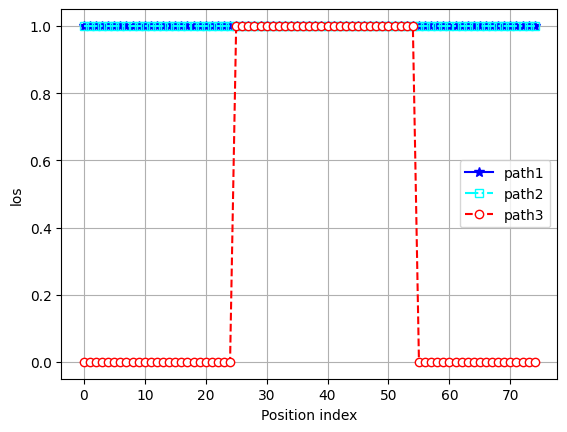

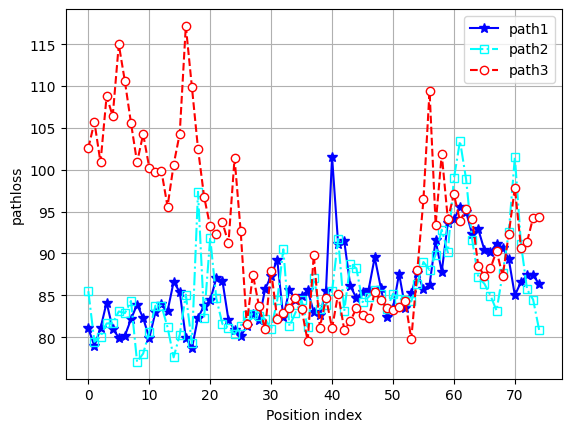

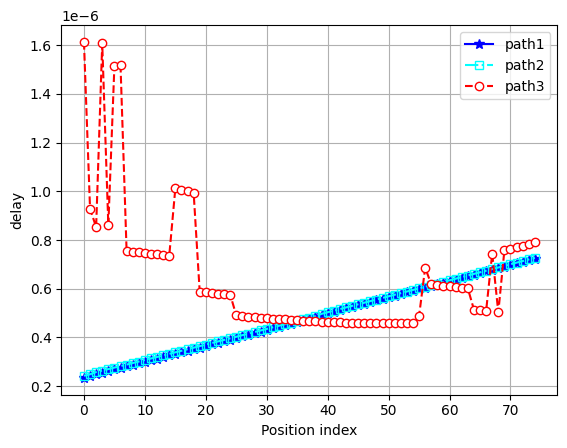

In [ ]:
# Feature variation across linear path

for var_name in ['los', 'pathloss', 'delay']:
    plt.figure()
    data = dataset[var_name] if var_name != 'delay' else dataset[var_name][:,0]
    plt.plot(data[idxs1], ls='-',  c='blue', label='path1',marker='*', markersize=7)
    plt.plot(data[idxs2], ls='-.', c='cyan', label='path2',marker='s', markerfacecolor='none')
    plt.plot(data[idxs3], ls='--', c='red',  label='path3',marker='o', markerfacecolor='w')
    plt.xlabel('Position index')
    plt.ylabel(f'{var_name}')
    plt.grid()
    plt.legend()
    plt.show()

## Rectangular Zones

Text(0.5, 1.0, 'Dataset zones on AoA Azimuth [º]')

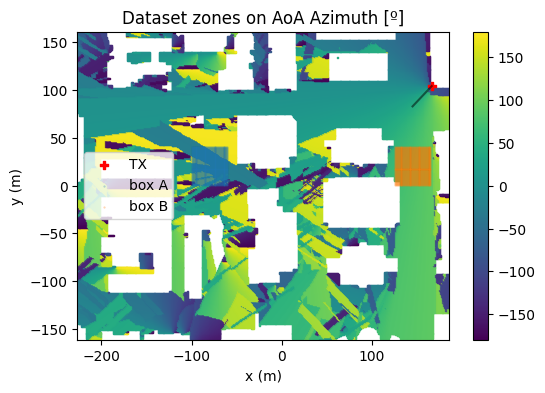

In [ ]:
idxs_A = dm.get_idxs_with_limits(dataset.rx_pos, x_min=-100, x_max=-60, y_min=0, y_max=40)

idxs_B = dm.get_idxs_with_limits(dataset.rx_pos, x_min= 125, x_max=165, y_min=0, y_max=40)

# Plot boxes
dataset.plot_coverage(dataset.aoa_az[:,0])

plt.scatter(dataset.rx_pos[idxs_A,0], dataset.rx_pos[idxs_A,1],
            label='box A', s=2, lw=.1, alpha=.3)
plt.scatter(dataset.rx_pos[idxs_B,0], dataset.rx_pos[idxs_B,1],
            label='box B', s=2, lw=.1, alpha=.3)
plt.legend()
plt.title('Dataset zones on AoA Azimuth [º]')

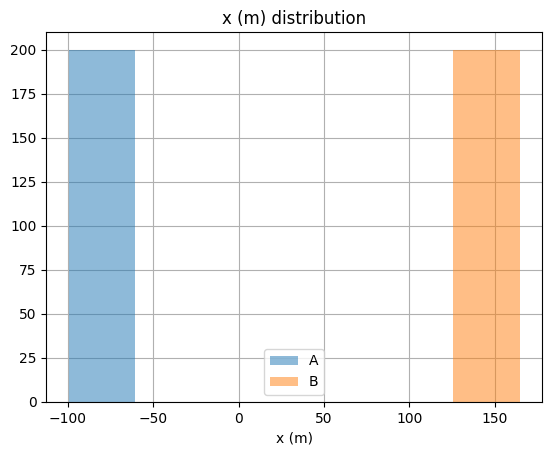

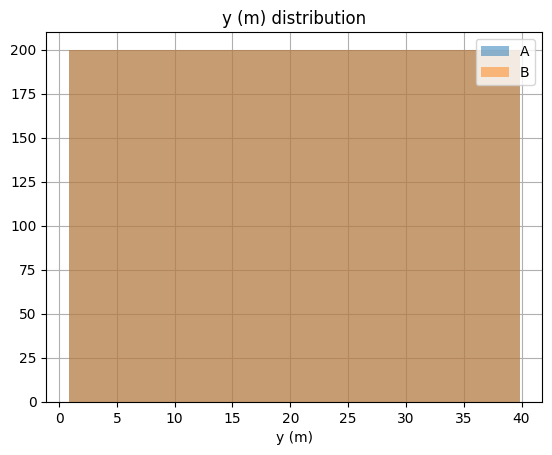

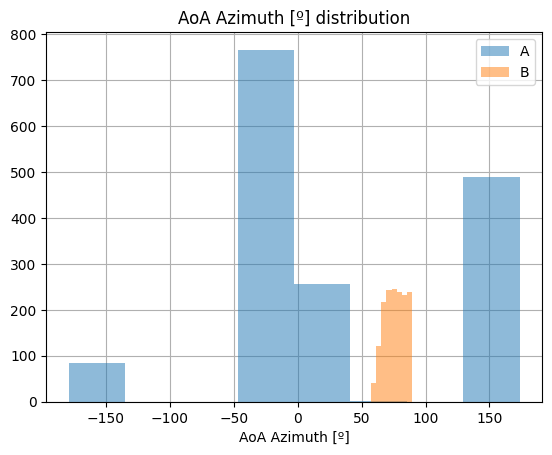

In [ ]:
def plot_feat_dist(data_A, data_B, feat_name):
    """Plot histograms of coordinate distributions for two datasets.

    Args:
        data_A: Array of coordinates for dataset A
        data_B: Array of coordinates for dataset B
    """
    hist_params = {'alpha': 0.5, 'bins': 8, 'zorder':2}

    # dist on x
    plt.figure()
    plt.hist(data_A, **hist_params, label='A')
    plt.hist(data_B, **hist_params, label='B')
    plt.title(f'{feat_name} distribution')
    plt.xlabel(f'{feat_name}')
    plt.grid()
    plt.legend()
    plt.show()

plot_feat_dist(dataset.rx_pos[idxs_A, 0], dataset.rx_pos[idxs_B, 0], 'x (m)')
plot_feat_dist(dataset.rx_pos[idxs_A, 1], dataset.rx_pos[idxs_B, 1], 'y (m)')
plot_feat_dist(dataset.aoa_az[idxs_A, 0], dataset.aoa_az[idxs_B, 0], 'AoA Azimuth [º]')

# Beamforming

## Computing Beamformers

In [ ]:
ch_params = dm.ChannelGenParameters()  # default array has 8 elements
ch_params.bs_antenna.rotation = np.array([0, 0, -135])
ch_params.bs_antenna.shape = np.array([32, 1])
dataset.compute_channels(ch_params)

n_beams = 16

beam_angles = np.around(np.linspace(-60, 60, n_beams), 2)
print(f'Beam angles: {beam_angles}')

# Compute Beamformers: F1 is [n_beams, n_ant]
F1 = np.array([dm.steering_vec(dataset.ch_params.bs_antenna.shape, phi=azi).squeeze()
               for azi in beam_angles])

# Apply beamformers
recv_bf_pwr_dbm = np.zeros((dataset.n_ue, n_beams)) * np.nan
mean_amplitude = np.abs(F1 @ dataset.channel[dataset.los != -1]).mean(axis=1).mean(axis=-1)
# Avg over rx antennas and subcarriers, respectively

# Convert to dBm
recv_bf_pwr_dbm[dataset.los != -1] = np.around(20*np.log10(mean_amplitude) + 30, 1)

Generating channels: 100%|██████████| 131931/131931 [00:03<00:00, 33277.95it/s]


Beam angles: [-60. -52. -44. -36. -28. -20. -12.  -4.   4.  12.  20.  28.  36.  44.
  52.  60.]


## Visualization

### Plot Received Power per Beam

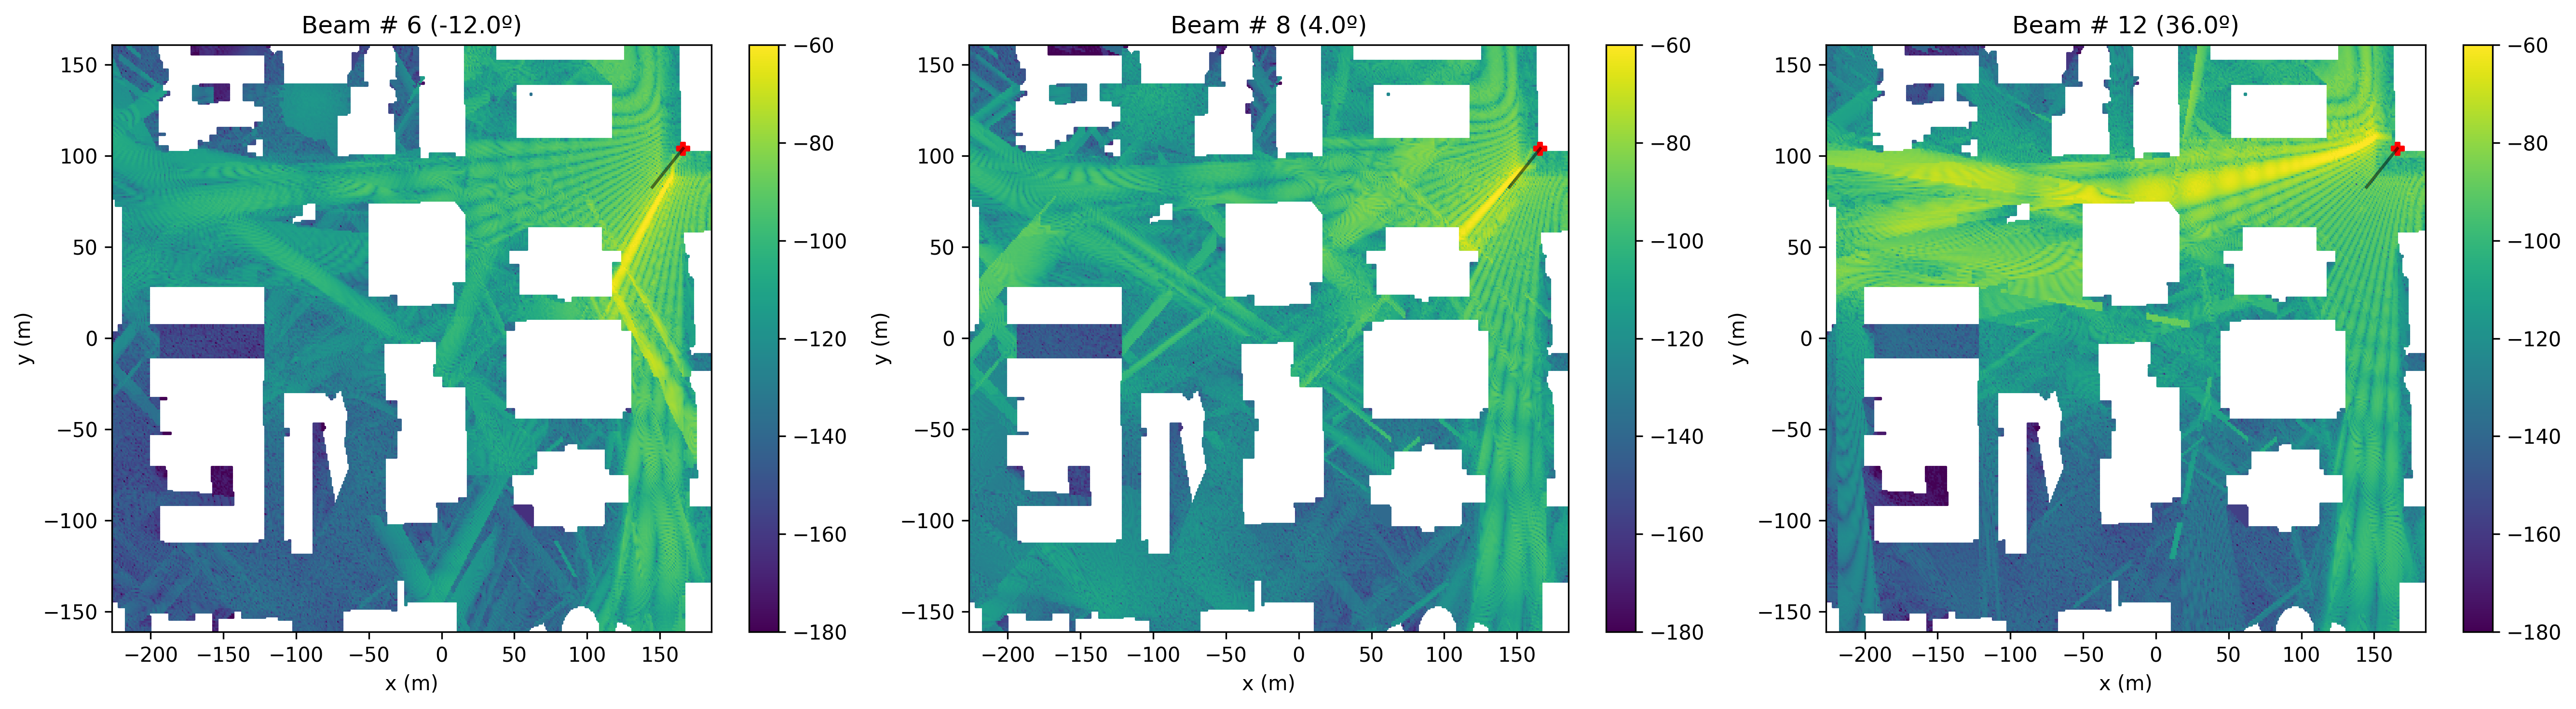

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=300, tight_layout=True)

for plt_idx, beam_idx in enumerate([6, 8, 12]):
    dataset.plot_coverage(recv_bf_pwr_dbm[:, beam_idx], ax=axes[plt_idx], lims=[-180, -60],
                          title=f'Beam # {beam_idx} ({beam_angles[beam_idx]:.1f}º)')

### Plot Best Beam per Position

(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Best Beams'}, xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52f79e83d0>)

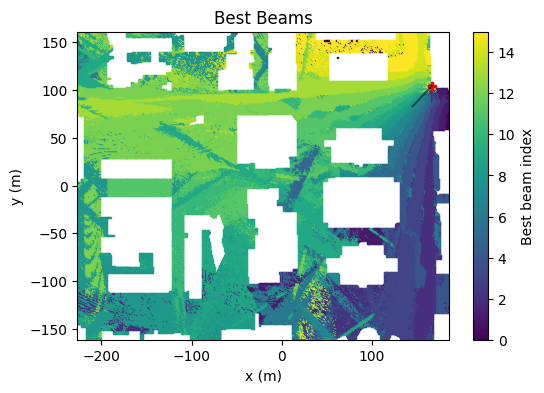

In [ ]:
# Average the power on each subband and get the index of the beam that delivers max pwr
best_beams = np.argmax(recv_bf_pwr_dbm, axis=1).astype(float)
best_beams[np.isnan(recv_bf_pwr_dbm[:, 0])] = np.nan

dm.plot_coverage(dataset.rx_pos, best_beams, bs_pos=dataset.tx_pos.T, bs_ori=dataset.tx_ori,
                 title= 'Best Beams', cbar_title='Best beam index')

### Plot Max Received Power

(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Best Beamformed Power (with grid of beams) '}, xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x7f52f78c83d0>)

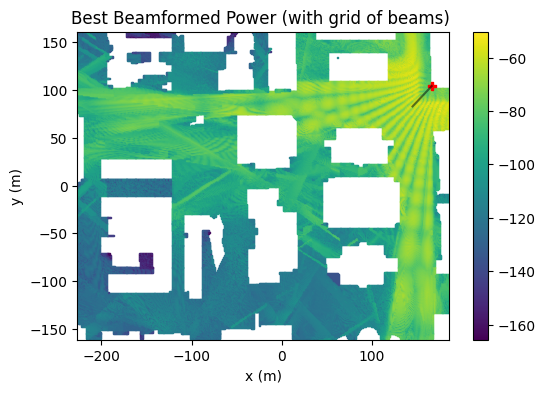

In [ ]:
max_bf_pwr = np.max(recv_bf_pwr_dbm, axis=1)
dm.plot_coverage(dataset.rx_pos, max_bf_pwr, bs_pos=dataset.tx_pos.T, bs_ori=dataset.tx_ori,
              title= 'Best Beamformed Power (with grid of beams) ')

# Convert to DeepMIMO

## From Wireless InSite



In [ ]:
!wget -O asu_campus_p2m.zip "https://www.dropbox.com/s/lgzw8am5v5qz06v/asu_campus_p2m.zip?e=1&st=pcon8w9l&dl=1"
!unzip asu_campus_p2m.zip

--2025-04-23 20:40:02--  https://www.dropbox.com/s/lgzw8am5v5qz06v/asu_campus_p2m.zip?e=1&st=pcon8w9l&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/0dn46pw1kwiemzmde2u3m/asu_campus_p2m.zip?e=1&rlkey=b7ojvsp8w37c8j528p7zt3gme&st=pcon8w9l&dl=1 [following]
--2025-04-23 20:40:03--  https://www.dropbox.com/scl/fi/0dn46pw1kwiemzmde2u3m/asu_campus_p2m.zip?e=1&rlkey=b7ojvsp8w37c8j528p7zt3gme&st=pcon8w9l&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc484d7070c557740926b6a12518.dl.dropboxusercontent.com/cd/0/inline/CoXDUNdCsRAZp3N3lkDbEM-dnGxGrPa1MgqGTa4RC0orn3AZc9LrmwJ7nFpy3SlR6hKGEWyREHpxzkGEIlGML7sl8O0PKUqc7uPL2RsNdlT3cit8oKadgiWX0YWalv-x-8rl5S4CavUUfev4eLMoq4nk/file?dl=1# [following]
--2025-04-23 20

In [ ]:
import deepmimo as dm

Determining converter...
Using Wireless Insite converter
Reading xml file: asu_campus.study_area_asu5.xml
Found 1 TXs (across 1 TX sets) and 2 RXs = 2 TX-RX set pairs
Processing TX/RX pairs: 1/2 (50.0%)
Reading p2m paths file: asu_campus.paths.t001_01.r004.p2m...


Processing paths of each RX: 100%|██████████| 131931/131931 [00:08<00:00, 15600.98it/s]


Reading paths file looking for tx position... Tx pos found!
Processing TX/RX pairs: 2/2 (100.0%)
Reading p2m paths file: asu_campus.paths.t001_01.r001.p2m...


Processing paths of each RX: 100%|██████████| 1/1 [00:00<00:00, 3017.48it/s]



Path processing completed!
Parsing materials from asu_campus/asu_buildings.city
Parsing materials from asu_campus/asu_plane.ter


Processing objs in asu_plane.ter: 100%|██████████| 1/1 [00:00<00:00, 1613.81it/s]


{'materials': {'material_0': {'alpha_i': 4.0,
                              'alpha_r': 4.0,
                              'conductivity': 0.08987,
                              'cross_polarization_coefficient': 0.4,
                              'horizontal_attenuation': 0.0,
                              'id': 0,
                              'lambda_param': 0.75,
                              'name': 'ITU Concrete 3.5 GHz',
                              'permittivity': 5.31,
                              'roughness': 0.0,
                              'scattering_coefficient': 0.2,
                              'scattering_model': 'directive',
                              'thickness': 0.3,
                              'vertical_attenuation': 0.0}},
 'rt_params': {'diffuse_diffractions': 1,
               'diffuse_final_interaction_only': True,
               'diffuse_random_phases': False,
               'diffuse_reflections': 2,
               'diffuse_transmissions': 0,
         

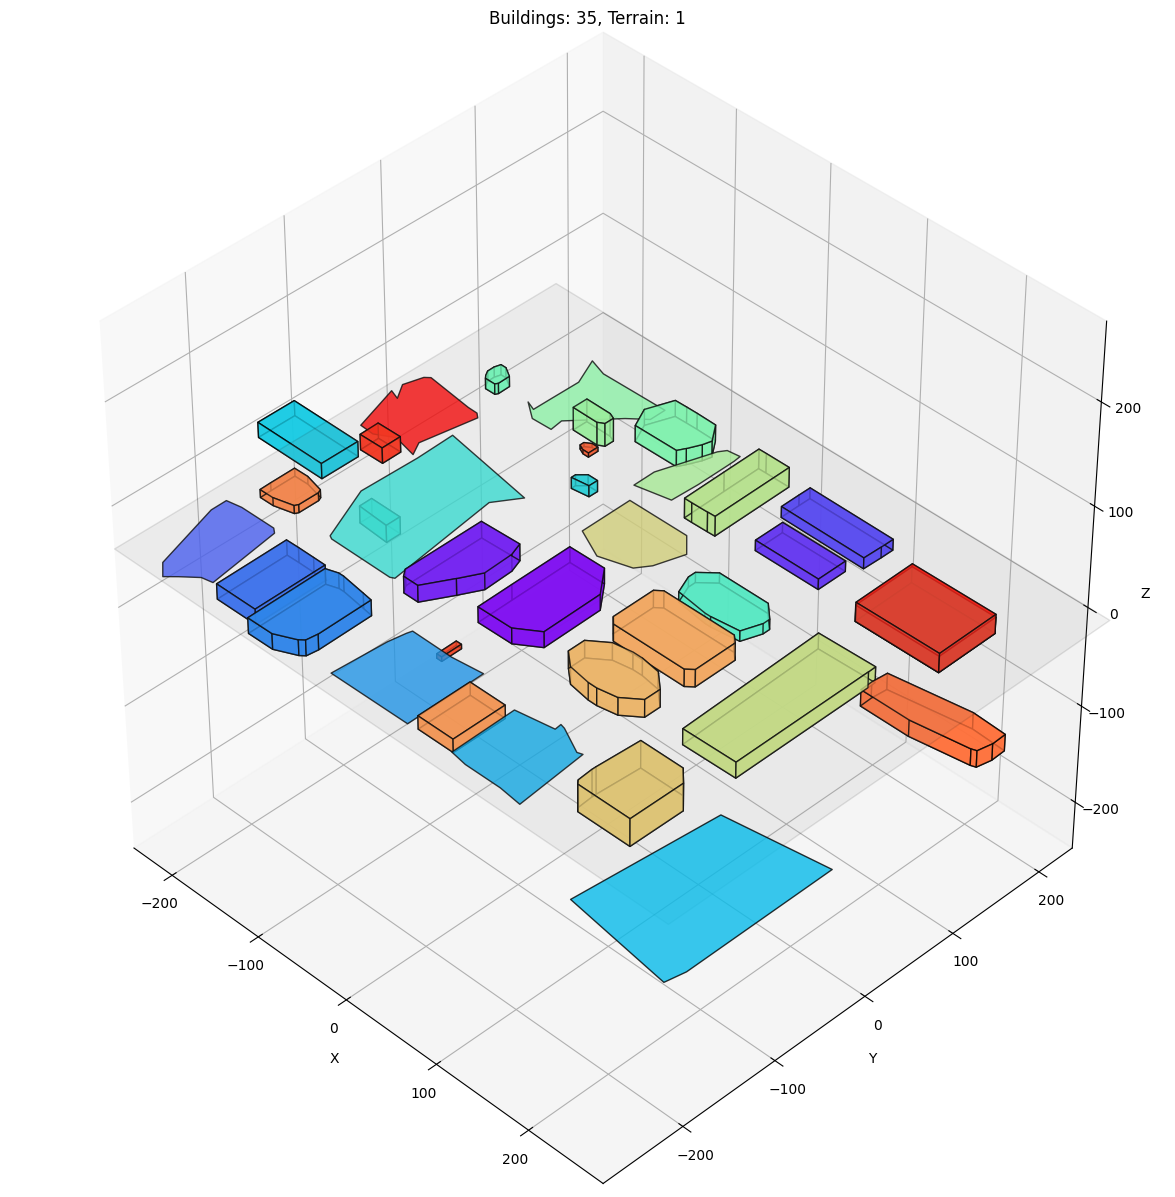

In [ ]:
rt_folder = 'asu_campus'
scen_name_insite = dm.convert(rt_folder, scenario_name='asu_campus_insite')

In [ ]:
dataset_insite = dm.load(scen_name_insite)


TX set: 1 (tx_idx: 0)
RX set: 0
Loading aoa_az_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading aoa_el_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading aod_az_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading aod_el_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading power_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading phase_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading delay_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading rx_pos_t001_tx000_r000.mat...Done. Shape: (131931, 3)
Loading tx_pos_t001_tx000_r000.mat...Done. Shape: (1, 3)
Loading inter_t001_tx000_r000.mat...Done. Shape: (131931, 10)
Loading inter_pos_t001_tx000_r000.mat...Done. Shape: (131931, 10, 6, 3)

TX set: 1 (tx_idx: 0)
RX set: 1
Loading aoa_az_t001_tx000_r001.mat...Done. Shape: (1, 10)
Loading aoa_el_t001_tx000_r001.mat...Done. Shape: (1, 10)
Loading aod_az_t001_tx000_r001.mat...Done. Shape: (1, 10)
Loading aod_el_t001_tx000_r001.mat...Done. Shape: (1, 10)
Loading pow

## From Sionna RT
Sionna is a bit more complicated because it doesn't have standard saving methods. Because of that, we use DeepMIMO exporter for Sionna, that saves the Scene, Path and computation parameters.

Below is an example of ray tracing a simple scene in Sionna and converting it to DeepMIMO.

In [ ]:
!pip install sionna==0.19.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.8 MB/s eta 0:00:00
  Attempting uninstall: sionna
    Found existing installation: sionna 0.19.1
    Uninstalling sionna-0.19.1:
      Successfully uninstalled sionna-0.19.1


In [ ]:
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

import sionna
from sionna.rt import load_scene, Transmitter, Receiver, PlanarArray, DirectivePattern

def compute_array_combinations(arrays):
    return np.stack(np.meshgrid(*arrays), -1).reshape(-1, len(arrays))

def gen_user_grid(box_corners, steps, box_offsets=None):
    """
    box_corners is = [bbox_min_corner, bbox_max_corner]
    steps = [x_step, y_step, z_step]
    """

    # Sample the ranges of coordinates
    ndim = len(box_corners[0])
    dim_ranges = []
    for dim in range(ndim):
        if steps[dim]:
            dim_range = np.arange(box_corners[0][dim], box_corners[1][dim], steps[dim])
        else:
            dim_range = np.array([box_corners[0][dim]]) # select just the first limit

        dim_ranges.append(dim_range + box_offsets[dim] if box_offsets else 0)

    pos = compute_array_combinations(dim_ranges)
    print(f'Total positions generated: {pos.shape[0]}')
    return pos


def create_base_scene(scene_path, center_frequency):
    scene = load_scene(scene_path)
    scene.frequency = center_frequency
    scene.tx_array = PlanarArray(num_rows=1,
                                 num_cols=1,
                                 vertical_spacing=0.5,
                                 horizontal_spacing=0.5,
                                 pattern="iso",
                                 polarization="V")

    scene.rx_array = scene.tx_array
    scene.synthetic_array = True

    return scene



# Save dict with compute path params to export later
my_compute_path_params = dict(
    max_depth=5,
    num_samples=1e6,
    scattering=False,
    diffraction=False
)
carrier_freq = 3.5 * 1e9  # Hz

tx_pos = [-33, 11, 32.03]

# 0- Create/Fetch scene and get buldings in the scene
scene = create_base_scene(sionna.rt.scene.simple_street_canyon,
                          center_frequency=carrier_freq)

# 1- Compute TX position
print('Computing BS position')
scene.add(Transmitter(name="tx", position=tx_pos, orientation=[0,0,0]))

# 2- Compute RXs positions
print('Computing UEs positions')
rxs = gen_user_grid(box_corners=[(-93, -60, 0), (93, 60, 0)],
                    steps=[4, 4, 0], box_offsets=[0, 0, 2])

# 3- Add the first batch of receivers to the scene
n_rx = len(rxs)
n_rx_in_scene = 10  # to compute in parallel
print(f'Adding users to the scene ({n_rx_in_scene} at a time)')
for rx_idx in range(n_rx_in_scene):
    scene.add(Receiver(name=f"rx_{rx_idx}", position=rxs[rx_idx], orientation=[0,0,0]))

# 4- Enable scattering in the radio materials
if my_compute_path_params['scattering']:
    for rm in scene.radio_materials.values():
        rm.scattering_coefficient = 1/np.sqrt(3) # [0,1]
        rm.scattering_pattern = DirectivePattern(alpha_r=10)

# 5- Compute the paths for each set of receiver positions
path_list = []
n_rx_remaining = n_rx
for x in tqdm(range(int(n_rx / n_rx_in_scene)+1), desc='Path computation'):
    if n_rx_remaining > 0:
        n_rx_remaining -= n_rx_in_scene
    else:
        break
    if x != 0:
        # modify current RXs in scene
        for rx_idx in range(n_rx_in_scene):
            if rx_idx + n_rx_in_scene*x < n_rx:
                scene.receivers[f'rx_{rx_idx}'].position = rxs[rx_idx + n_rx_in_scene*x]
            else:
                # remove the last receivers in the scene
                scene.remove(f'rx_{rx_idx}')

    paths = scene.compute_paths(**my_compute_path_params)

    paths.normalize_delays = False  # sum min_tau to tau, or tau of 1st path is always = 0

    path_list.append(paths)

RecursionError: maximum recursion depth exceeded

In [ ]:
# !pip install deepmimo

In [ ]:
from deepmimo.converter.sionna_rt import sionna_exporter

save_folder = 'sionna_test_scen/'

sionna_exporter.export_to_deepmimo(scene, path_list, my_compute_path_params, save_folder)

In [ ]:
# To download the
!zip -r sionna_test_scen.zip sionna_test_scen
from google.colab import files
files.download("sionna_test_scen.zip")

In [ ]:
import deepmimo as dm

scen_name_sionna = dm.convert(save_folder)

In [ ]:
dataset_sionna = dm.load(scen_name_sionna)

In [ ]:
main_keys = ['aoa_az', 'aoa_el', 'aod_az', 'aod_el', 'delay', 'power', 'phase',
             'los', 'num_paths']

for key in main_keys:
    mat = dataset_sionna[key]
    plt_var = mat[:,0] if mat.ndim == 2 else mat
    dataset_sionna.plot_coverage(plt_var, title=key, scat_sz=20)

# Upload to DeepMIMO

## Upload

In [ ]:
dm.upload(scen_name_sionna, key='')  # Get key in DeepMIMO dashboard (in "Contribute")

In [ ]:
scen_name_sionna